In [1]:
import pandas as pd
import numpy as np

In [2]:
data_sources = {
    'logs': '/kaggle/input/supplychain/LogsofDataSet.csv',
    'data': '/kaggle/input/supplychain/DataSet.csv',
    'desc': '/kaggle/input/supplychain/DescriptionofDataSet.csv'
}

In [3]:
logs_df = pd.read_csv(data_sources['logs'], encoding="ISO-8859-1")
main_df = pd.read_csv(data_sources['data'], encoding="ISO-8859-1")
description_df = pd.read_csv(data_sources['desc'], encoding="ISO-8859-1")

In [4]:
description_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FIELDS       52 non-null     object
 1   DESCRIPTION  52 non-null     object
dtypes: object(2)
memory usage: 960.0+ bytes


In [5]:
description_df

,FIELDS,DESCRIPTION
0,Type,: Type of transaction made
1,Days for shipping (real),: Actual shipping days of the purchased product
2,Days for shipment (scheduled),: Days of scheduled delivery of the purchased...
3,Benefit per order,: Earnings per order placed
4,Sales per customer,: Total sales per customer made per customer
5,Delivery Status,: Delivery status of orders: Advance shipping...
6,Late_delivery_risk,: Categorical variable that indicates if send...
7,Category Id,: Product category code
8,Category Name,: Description of the product category
9,Customer City,: City where the customer made the purchase


In [6]:
logs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469977 entries, 0 to 469976
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Product     469977 non-null  object
 1   Category    469977 non-null  object
 2   Date        469977 non-null  object
 3   Month       469977 non-null  object
 4   Hour        469977 non-null  int64 
 5   Department  469977 non-null  object
 6   ip          469977 non-null  object
 7   url         469977 non-null  object
dtypes: int64(1), object(7)
memory usage: 28.7+ MB


In [7]:
logs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469977 entries, 0 to 469976
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Product     469977 non-null  object
 1   Category    469977 non-null  object
 2   Date        469977 non-null  object
 3   Month       469977 non-null  object
 4   Hour        469977 non-null  int64 
 5   Department  469977 non-null  object
 6   ip          469977 non-null  object
 7   url         469977 non-null  object
dtypes: int64(1), object(7)
memory usage: 28.7+ MB


In [8]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [9]:
main_df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [10]:
main_df.shape

(180519, 53)

In [11]:
num = main_df.select_dtypes(exclude='object')
cat = main_df.select_dtypes(include='object')

In [12]:
num.columns

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Late_delivery_risk',
       'Category Id', 'Customer Id', 'Customer Zipcode', 'Department Id',
       'Latitude', 'Longitude', 'Order Customer Id', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Zipcode',
       'Product Card Id', 'Product Category Id', 'Product Description',
       'Product Price', 'Product Status'],
      dtype='object')

In [13]:
cat.columns

Index(['Type', 'Delivery Status', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Department Name', 'Market',
       'Order City', 'Order Country', 'order date (DateOrders)',
       'Order Region', 'Order State', 'Order Status', 'Product Image',
       'Product Name', 'shipping date (DateOrders)', 'Shipping Mode'],
      dtype='object')

In [14]:
print(f"Numerical columns are : {num.shape[1]} \n Categorical columns are : {cat.shape[1]}")

Numerical columns are : 29 
 Categorical columns are : 24


In [15]:
missing = main_df.isnull().sum()
missing

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [16]:
important_cat = ['Type', 'Delivery Status', 'Customer Segment', 'Order Status', 
                 'Shipping Mode', 'order date (DateOrders)', 'shipping date (DateOrders)']

In [17]:
inden = " " * 38
print('The important categorical features are\n' + '\n'.join([inden + i for i in important_cat]))

The important categorical features are
                                      Type
                                      Delivery Status
                                      Customer Segment
                                      Order Status
                                      Shipping Mode
                                      order date (DateOrders)
                                      shipping date (DateOrders)


In [18]:
important_num = ['Days for shipping (real)', 'Days for shipment (scheduled)',
                 'Benefit per order', 'Sales per customer', 'Late_delivery_risk',
                 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Product Price',
                 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total',
                 'Order Profit Per Order', 'Product Price']

In [19]:
inden = " " * 38
print('The important numerical features are\n' + '\n'.join([inden + i for i in important_num]))

The important numerical features are
                                      Days for shipping (real)
                                      Days for shipment (scheduled)
                                      Benefit per order
                                      Sales per customer
                                      Late_delivery_risk
                                      Order Item Discount
                                      Order Item Discount Rate
                                      Order Item Product Price
                                      Order Item Profit Ratio
                                      Order Item Quantity
                                      Sales
                                      Order Item Total
                                      Order Profit Per Order
                                      Product Price


In [20]:
important_columns = important_cat + important_num
main_df = main_df[important_columns]

In [21]:
main_df.columns

Index(['Type', 'Delivery Status', 'Customer Segment', 'Order Status',
       'Shipping Mode', 'order date (DateOrders)',
       'shipping date (DateOrders)', 'Days for shipping (real)',
       'Days for shipment (scheduled)', 'Benefit per order',
       'Sales per customer', 'Late_delivery_risk', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Product Price'],
      dtype='object')

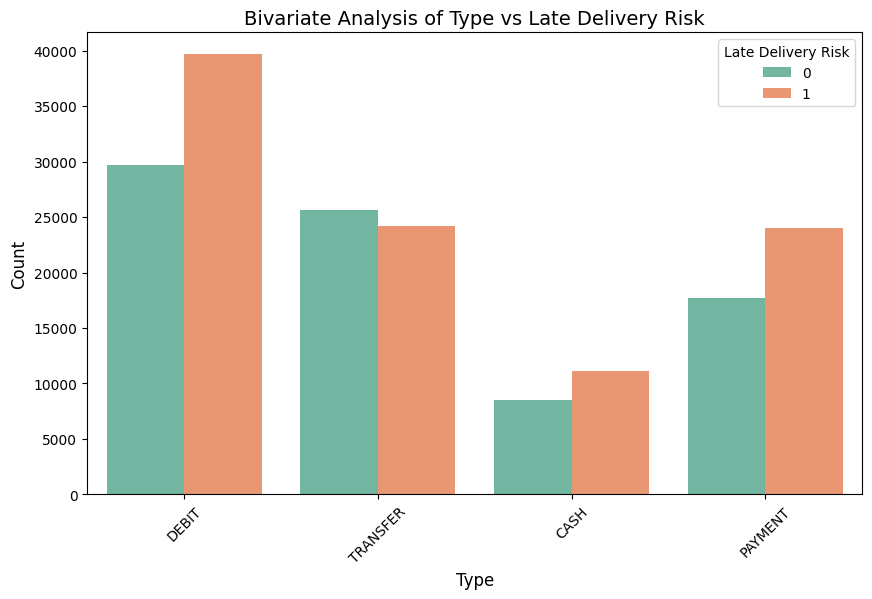

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.countplot(data=main_df, x='Type', hue='Late_delivery_risk', palette='Set2')
plt.title('Bivariate Analysis of Type vs Late Delivery Risk', fontsize=14)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Late Delivery Risk', loc='upper right')
plt.show()


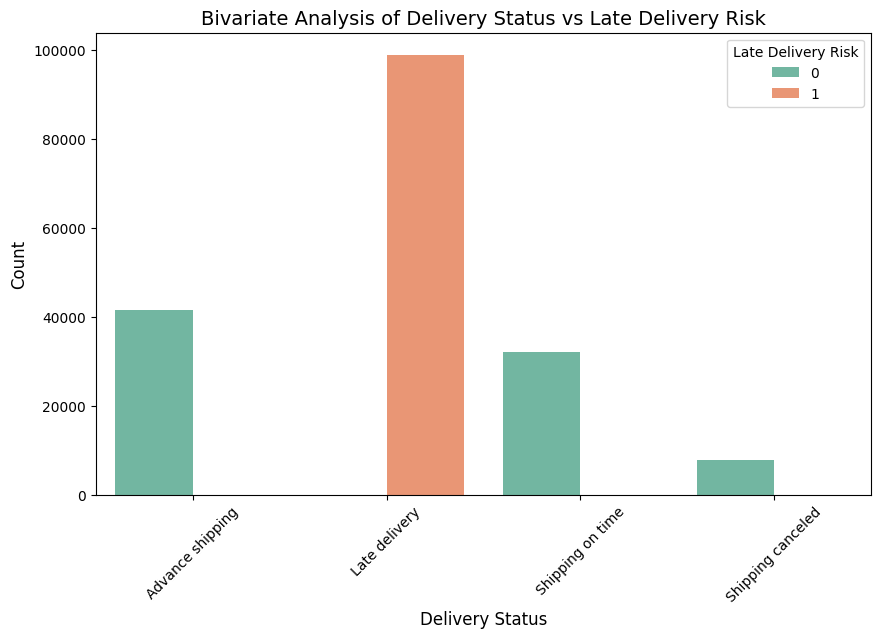

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=main_df, x='Delivery Status', hue='Late_delivery_risk', palette='Set2')
plt.title('Bivariate Analysis of Delivery Status vs Late Delivery Risk', fontsize=14)
plt.xlabel('Delivery Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Late Delivery Risk', loc='upper right')
plt.show()


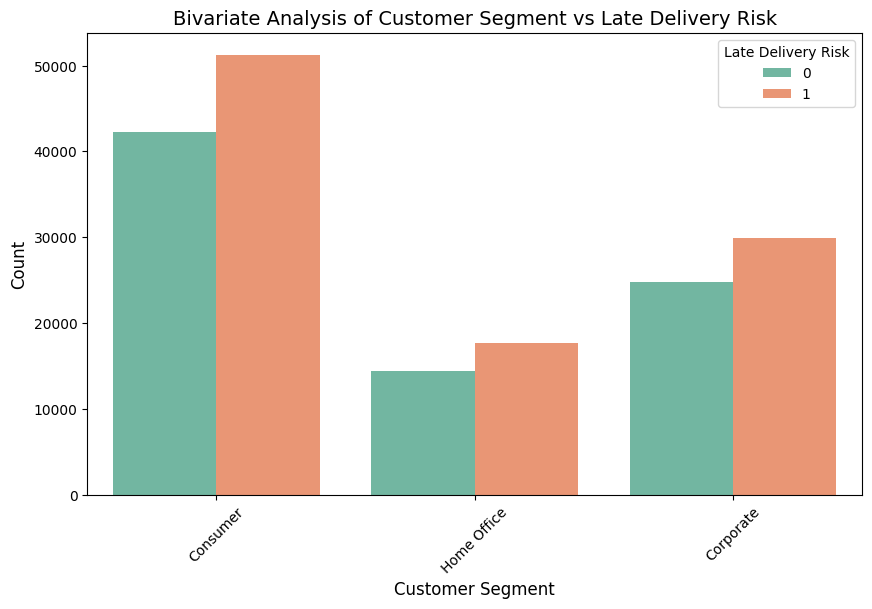

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=main_df, x='Customer Segment', hue='Late_delivery_risk', palette='Set2')
plt.title('Bivariate Analysis of Customer Segment vs Late Delivery Risk', fontsize=14)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Late Delivery Risk', loc='upper right')
plt.show()


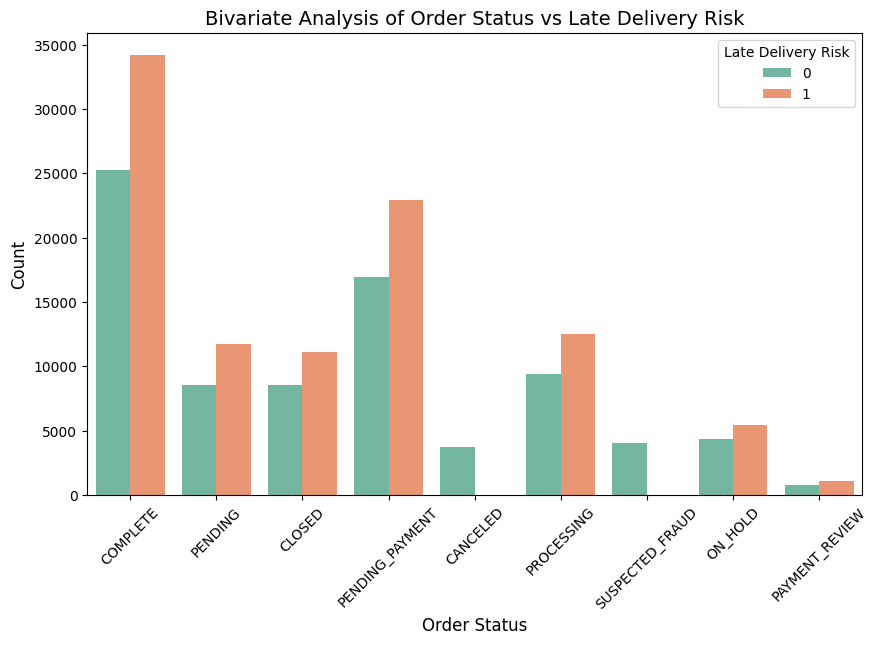

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(data=main_df, x='Order Status', hue='Late_delivery_risk', palette='Set2')
plt.title('Bivariate Analysis of Order Status vs Late Delivery Risk', fontsize=14)
plt.xlabel('Order Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Late Delivery Risk', loc='upper right')
plt.show()

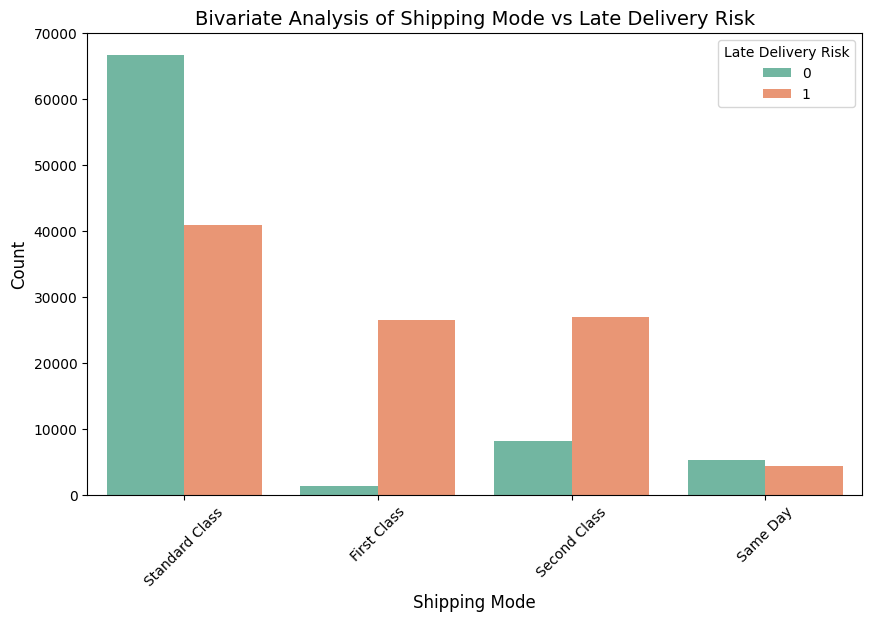

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=main_df, x='Shipping Mode', hue='Late_delivery_risk', palette='Set2')
plt.title('Bivariate Analysis of Shipping Mode vs Late Delivery Risk', fontsize=14)
plt.xlabel('Shipping Mode', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Late Delivery Risk', loc='upper right')
plt.show()


In [27]:
main_df['DateOrders'] = pd.to_datetime(main_df['order date (DateOrders)'], format='%m/%d/%Y %H:%M')
main_df['Shipping Date'] = pd.to_datetime(main_df['shipping date (DateOrders)'], format='%m/%d/%Y %H:%M')

In [28]:
main_df['Order Year'] = main_df['DateOrders'].dt.year
main_df['Order Month'] = main_df['DateOrders'].dt.month
main_df['Order Day'] = main_df['DateOrders'].dt.day
main_df['Order Weekday'] = main_df['DateOrders'].dt.weekday 
main_df['Order Hour'] = main_df['DateOrders'].dt.hour

main_df['Shipping Year'] = main_df['Shipping Date'].dt.year
main_df['Shipping Month'] = main_df['Shipping Date'].dt.month
main_df['Shipping Day'] = main_df['Shipping Date'].dt.day
main_df['Shipping Weekday'] = main_df['Shipping Date'].dt.weekday
main_df['Shipping Hour'] = main_df['Shipping Date'].dt.hour

In [29]:
main_df['Delivery Time'] = (main_df['Shipping Date'] - main_df['DateOrders']).dt.total_seconds() / 3600

# Create Delivery Time Category
def categorize_delivery_time(hours):
    if hours < 20:
        return 0  # Very Short
    elif 20 <= hours <= 50:
        return 1  # Short
    elif 51 <= hours <= 80:
        return 2  # Medium
    else:
        return 3  # Long

main_df['Delivery Time Category'] = main_df['Delivery Time'].apply(categorize_delivery_time)

In [30]:
main_df['Weekend'] = main_df['Order Weekday'].apply(lambda x: 1 if x >= 5 else 0)

In [31]:
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 0       
    elif 12 <= hour < 17:
        return 1          
    elif 17 <= hour < 21:
        return 2       
    else:
        return 3 

In [32]:
main_df['Order Time of Day'] = main_df['Order Hour'].apply(categorize_time_of_day)
main_df['Shipping Time of Day'] = main_df['Shipping Hour'].apply(categorize_time_of_day)

In [33]:
main_df['Delivery Time']

0          72.0
1         120.0
2          96.0
3          72.0
4          48.0
          ...  
180514     96.0
180515     72.0
180516    120.0
180517     72.0
180518     96.0
Name: Delivery Time, Length: 180519, dtype: float64

Delivery Time Statistics:
Mean Delivery Time: 83.97 hours
Median Delivery Time: 72.00 hours
Standard Deviation: 38.82 hours


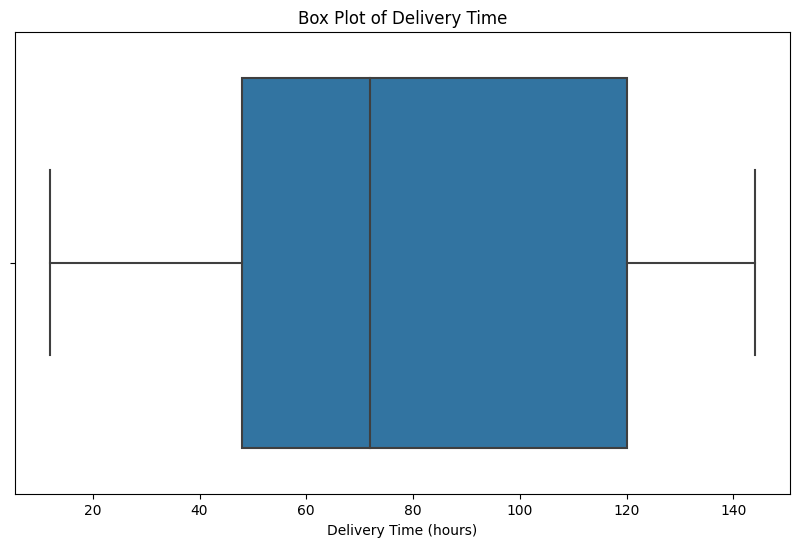

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


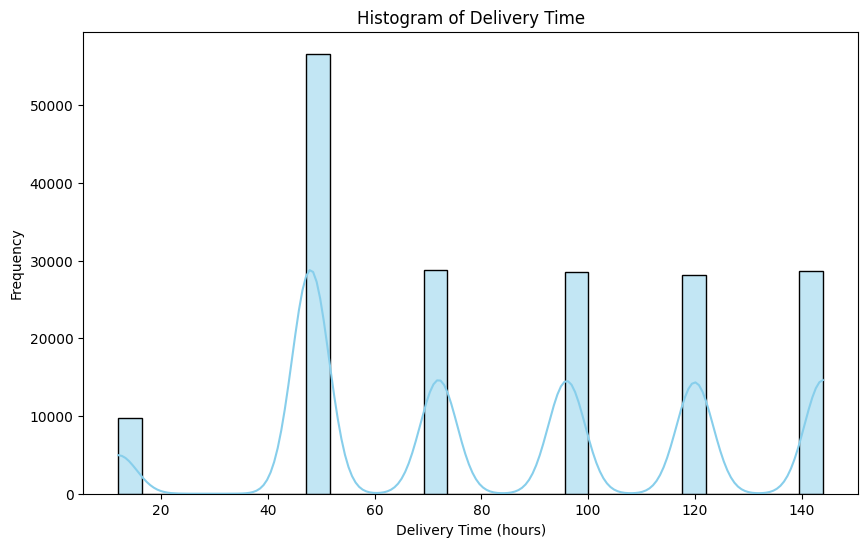

In [34]:
import matplotlib.pyplot as plt


mean_delivery_time = main_df['Delivery Time'].mean()
median_delivery_time = main_df['Delivery Time'].median()
std_delivery_time = main_df['Delivery Time'].std()

print("Delivery Time Statistics:")
print(f"Mean Delivery Time: {mean_delivery_time:.2f} hours")
print(f"Median Delivery Time: {median_delivery_time:.2f} hours")
print(f"Standard Deviation: {std_delivery_time:.2f} hours")

plt.figure(figsize=(10, 6))
sns.boxplot(x=main_df['Delivery Time'])
plt.title('Box Plot of Delivery Time')
plt.xlabel('Delivery Time (hours)')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(main_df['Delivery Time'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of Delivery Time')
plt.xlabel('Delivery Time (hours)')
plt.ylabel('Frequency')
plt.show()


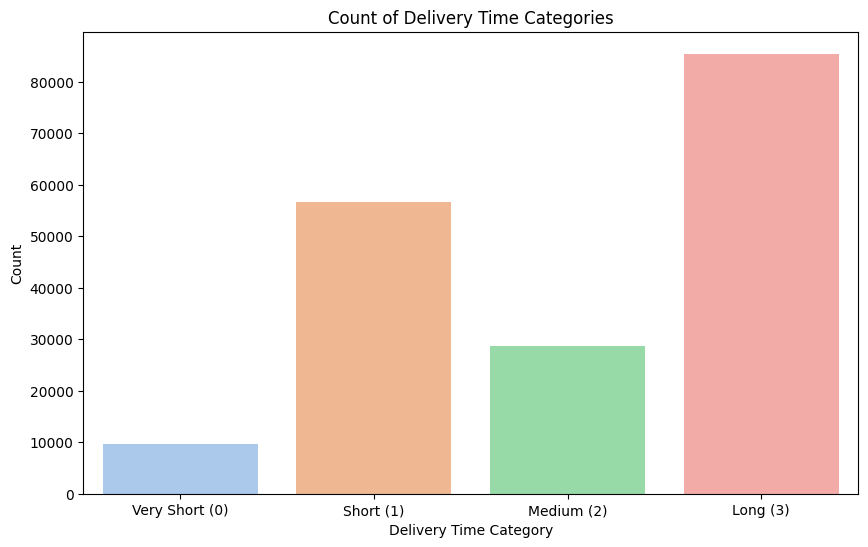

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count Plot for Delivery Time Category
plt.figure(figsize=(10, 6))
sns.countplot(x='Delivery Time Category', data=main_df, palette='pastel')
plt.title('Count of Delivery Time Categories')
plt.xlabel('Delivery Time Category')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Very Short (0)', 'Short (1)', 'Medium (2)', 'Long (3)'])
plt.show()


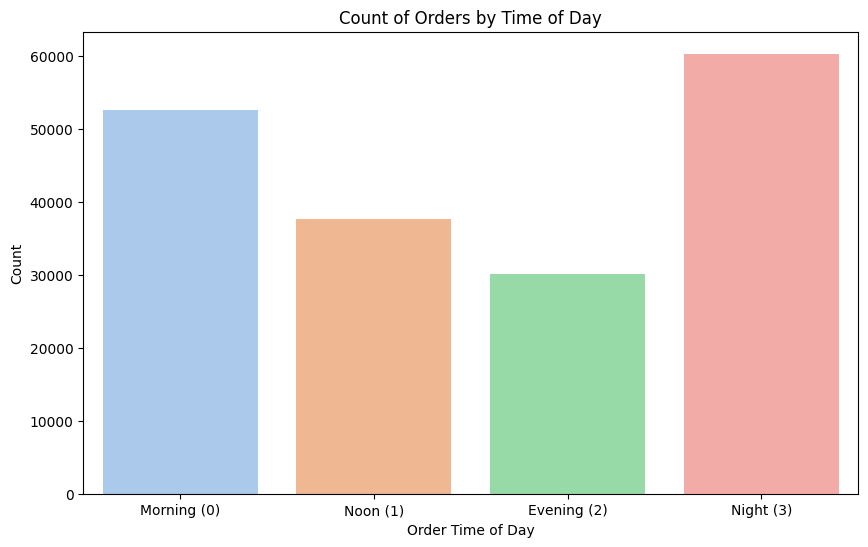

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count Plot for Order Time of Day
plt.figure(figsize=(10, 6))
sns.countplot(x='Order Time of Day', data=main_df, palette='pastel')
plt.title('Count of Orders by Time of Day')
plt.xlabel('Order Time of Day')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Morning (0)', 'Noon (1)', 'Evening (2)', 'Night (3)'])
plt.show()


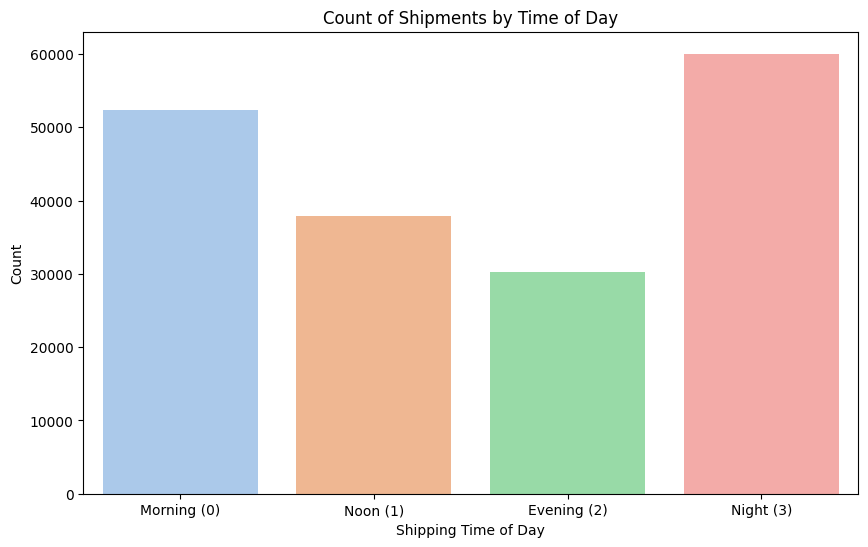

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Shipping Time of Day', data=main_df, palette='pastel')
plt.title('Count of Shipments by Time of Day')
plt.xlabel('Shipping Time of Day')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Morning (0)', 'Noon (1)', 'Evening (2)', 'Night (3)'])
plt.show()

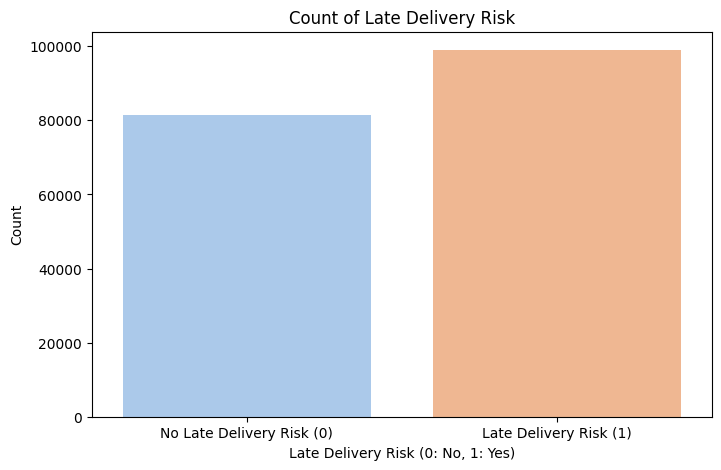

Count of Late Delivery Risk:
Late_delivery_risk
1    98977
0    81542
Name: count, dtype: int64


In [38]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Late_delivery_risk', data=main_df, palette='pastel')
plt.title('Count of Late Delivery Risk')
plt.xlabel('Late Delivery Risk (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Late Delivery Risk (0)', 'Late Delivery Risk (1)'])
plt.show()

# Count of Late Delivery Risk
late_delivery_count = main_df['Late_delivery_risk'].value_counts()
print("Count of Late Delivery Risk:")
print(late_delivery_count)


In [39]:
print("Unique values in 'Type':", main_df['Type'].unique())
print("Unique values in 'Shipping Mode':", main_df['Shipping Mode'].unique())

Unique values in 'Type': ['DEBIT' 'TRANSFER' 'CASH' 'PAYMENT']
Unique values in 'Shipping Mode': ['Standard Class' 'First Class' 'Second Class' 'Same Day']


In [40]:
import pandas as pd

# One-hot encode the categorical variables without dropping the first category
encoded_df = pd.get_dummies(main_df[['Type', 'Customer Segment', 'Order Status', 'Delivery Status', 'Shipping Mode']], drop_first=False)

# Concatenate the encoded columns with the Late_delivery_risk column
correlation_df = pd.concat([encoded_df, main_df['Late_delivery_risk']], axis=1)

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Extracting the correlation of each feature with Late_delivery_risk
late_delivery_correlation = correlation_matrix['Late_delivery_risk'].sort_values(ascending=False)

# Display the correlation values
print(late_delivery_correlation)

Late_delivery_risk                   1.000000
Delivery Status_Late delivery        1.000000
Shipping Mode_First Class            0.347259
Shipping Mode_Second Class           0.215689
Type_DEBIT                           0.037884
Order Status_COMPLETE                0.037430
Type_PAYMENT                         0.029746
Order Status_PENDING_PAYMENT         0.029056
Order Status_PENDING                 0.021940
Order Status_PROCESSING              0.016852
Type_CASH                            0.012651
Order Status_CLOSED                  0.012651
Order Status_PAYMENT_REVIEW          0.004817
Order Status_ON_HOLD                 0.003662
Customer Segment_Home Office         0.002260
Customer Segment_Consumer           -0.000433
Customer Segment_Corporate          -0.001412
Shipping Mode_Same Day              -0.043595
Type_TRANSFER                       -0.078046
Order Status_CANCELED               -0.159196
Order Status_SUSPECTED_FRAUD        -0.167158
Delivery Status_Shipping canceled 

In [41]:
from scipy.stats import chi2_contingency

In [42]:
import pandas as pd
from scipy.stats import chi2_contingency

# Categorical variables for the test
categorical_vars = ['Type', 'Customer Segment', 'Order Status', 'Delivery Status', 'Shipping Mode']

# Function to perform the chi-square test
def chi_square_test(df, categorical_var, target_var):
    # Create a contingency table
    contingency_table = pd.crosstab(df[categorical_var], df[target_var])
    
    # Perform the chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Display results
    print(f"Chi-square test results for {categorical_var}:")
    print(f"Chi-square value: {chi2}")
    print(f"p-value: {p}")
    print(f"Degrees of freedom: {dof}\n")
    
    return p

# Applying the test for each categorical variable
for var in categorical_vars:
    chi_square_test(main_df, var, 'Late_delivery_risk')


Chi-square test results for Type:
Chi-square value: 1103.922832602519
p-value: 5.128672571053333e-239
Degrees of freedom: 3

Chi-square test results for Customer Segment:
Chi-square value: 1.0247401261548736
p-value: 0.5990740516327164
Degrees of freedom: 2

Chi-square test results for Order Status:
Chi-square value: 9854.657148744149
p-value: 0.0
Degrees of freedom: 8

Chi-square test results for Delivery Status:
Chi-square value: 180519.0
p-value: 0.0
Degrees of freedom: 3

Chi-square test results for Shipping Mode:
Chi-square value: 37716.04250472746
p-value: 0.0
Degrees of freedom: 3



In [43]:
correlation = main_df['Delivery Time'].corr(main_df['Late_delivery_risk'])

print("Pearson Correlation Coefficient between Delivery Time and Late Delivery Risk:", correlation)
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(main_df['Delivery Time'], main_df['Late_delivery_risk'])

print("Pearson Correlation Coefficient:", correlation)
print("P-value:", p_value)


Pearson Correlation Coefficient between Delivery Time and Late Delivery Risk: 0.3868607466802838
Pearson Correlation Coefficient: 0.3868607466802836
P-value: 0.0


In [44]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a function to perform Chi-square test
def chi_square_test(variable, target):
    # Create a contingency table
    contingency_table = pd.crosstab(main_df[variable], main_df[target])
    
    # Perform the Chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    return chi2, p_value, dof, expected

# List of variables to test
variables = [
    'Shipping Weekday',
    'Shipping Hour',
    'Shipping Time of Day',
    'Order Weekday',
    'Order Hour',
    'Order Time of Day'
]

# Dictionary to hold results
results = {}

# Perform Chi-square tests for each variable
for variable in variables:
    chi2, p_value, dof, expected = chi_square_test(variable, 'Late_delivery_risk')
    results[variable] = {
        'Chi-square value': chi2,
        'p-value': p_value,
        'Degrees of freedom': dof
    }

# Print results
for variable, result in results.items():
    print(f"Chi-square test results for {variable}:")
    print(f"Chi-square value: {result['Chi-square value']}")
    print(f"p-value: {result['p-value']}")
    print(f"Degrees of freedom: {result['Degrees of freedom']}\n")


Chi-square test results for Shipping Weekday:
Chi-square value: 6.921610570222658
p-value: 0.3281575337157548
Degrees of freedom: 6

Chi-square test results for Shipping Hour:
Chi-square value: 490.3635662906024
p-value: 3.563948833711146e-89
Degrees of freedom: 23

Chi-square test results for Shipping Time of Day:
Chi-square value: 274.08832313127806
p-value: 4.0265964601897845e-59
Degrees of freedom: 3

Chi-square test results for Order Weekday:
Chi-square value: 7.822900857062852
p-value: 0.25136733905333536
Degrees of freedom: 6

Chi-square test results for Order Hour:
Chi-square value: 653.1634831947973
p-value: 3.1833759514746366e-123
Degrees of freedom: 23

Chi-square test results for Order Time of Day:
Chi-square value: 402.0779368435697
p-value: 7.853381119485383e-87
Degrees of freedom: 3



In [45]:
import pandas as pd
from scipy.stats import pointbiserialr

# Create a function to calculate point-biserial correlation
def point_biserial_corr(variable, target):
    correlation, p_value = pointbiserialr(main_df[variable], main_df[target])
    return correlation, p_value

# List of variables to test
variables = [
    'Shipping Weekday',
    'Shipping Hour',
    'Shipping Time of Day',
    'Order Weekday',
    'Order Hour',
    'Order Time of Day',
     'Order Year',
    'Order Month',
    'Order Day',
    'Weekend',
    'Shipping Year',
    'Shipping Month',
    'Shipping Day',
    'Delivery Time Category'
]

# Dictionary to hold results
correlation_results = {}

# Calculate correlations for each variable
for variable in variables:
    correlation, p_value = point_biserial_corr(variable, 'Late_delivery_risk')
    correlation_results[variable] = {
        'Correlation coefficient': correlation,
        'p-value': p_value
    }

# Print results
for variable, result in correlation_results.items():
    print(f"Point-biserial correlation results for {variable}:")
    print(f"Correlation coefficient: {result['Correlation coefficient']}")
    print(f"p-value: {result['p-value']}\n")


Point-biserial correlation results for Shipping Weekday:
Correlation coefficient: 0.0007325477132053905
p-value: 0.7556187098862456

Point-biserial correlation results for Shipping Hour:
Correlation coefficient: -0.04339034656764666
p-value: 5.82197400549659e-76

Point-biserial correlation results for Shipping Time of Day:
Correlation coefficient: -0.008672617366364066
p-value: 0.00022886030755892256

Point-biserial correlation results for Order Weekday:
Correlation coefficient: 0.00112089584520018
p-value: 0.6339049845438819

Point-biserial correlation results for Order Hour:
Correlation coefficient: 0.04704594414948695
p-value: 5.552302916125297e-89

Point-biserial correlation results for Order Time of Day:
Correlation coefficient: 0.014877895225341045
p-value: 2.589426526349e-10

Point-biserial correlation results for Order Year:
Correlation coefficient: -0.0021807932498253348
p-value: 0.3541551251444438

Point-biserial correlation results for Order Month:
Correlation coefficient: 0

In [46]:
main_df.columns

Index(['Type', 'Delivery Status', 'Customer Segment', 'Order Status',
       'Shipping Mode', 'order date (DateOrders)',
       'shipping date (DateOrders)', 'Days for shipping (real)',
       'Days for shipment (scheduled)', 'Benefit per order',
       'Sales per customer', 'Late_delivery_risk', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Product Price',
       'DateOrders', 'Shipping Date', 'Order Year', 'Order Month', 'Order Day',
       'Order Weekday', 'Order Hour', 'Shipping Year', 'Shipping Month',
       'Shipping Day', 'Shipping Weekday', 'Shipping Hour', 'Delivery Time',
       'Delivery Time Category', 'Weekend', 'Order Time of Day',
       'Shipping Time of Day'],
      dtype='object')

In [47]:
main_df = pd.get_dummies(main_df, columns=['Type', 'Shipping Mode', 'Order Status'], drop_first=False)
print(main_df.columns)


Index(['Delivery Status', 'Customer Segment', 'order date (DateOrders)',
       'shipping date (DateOrders)', 'Days for shipping (real)',
       'Days for shipment (scheduled)', 'Benefit per order',
       'Sales per customer', 'Late_delivery_risk', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Product Price',
       'DateOrders', 'Shipping Date', 'Order Year', 'Order Month', 'Order Day',
       'Order Weekday', 'Order Hour', 'Shipping Year', 'Shipping Month',
       'Shipping Day', 'Shipping Weekday', 'Shipping Hour', 'Delivery Time',
       'Delivery Time Category', 'Weekend', 'Order Time of Day',
       'Shipping Time of Day', 'Type_CASH', 'Type_DEBIT', 'Type_PAYMENT',
       'Type_TRANSFER', 'Shipping Mode_First Class', 'Shipping Mode_Same Day',
       'Shipping Mode_Second Class', 'Shipping Mode_Standard Class',
       'Ord

In [48]:
columns_to_drop = [
    'Delivery Status', 'Weekend','Customer Segment',
    'Order Year', 'Order Month', 'Order Day', 'Order Weekday',
    'Shipping Year', 'Shipping Month', 'Shipping Day', 'Shipping Weekday',
    'shipping date (DateOrders)', 'order date (DateOrders)', 'DateOrders','Shipping Date','Delivery Time Category','Order Item Quantity'
]

main_df = main_df.drop(columns=columns_to_drop)

main_df.columns


Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Late_delivery_risk',
       'Order Item Discount', 'Order Item Discount Rate',
       'Order Item Product Price', 'Order Item Profit Ratio', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Product Price',
       'Order Hour', 'Shipping Hour', 'Delivery Time', 'Order Time of Day',
       'Shipping Time of Day', 'Type_CASH', 'Type_DEBIT', 'Type_PAYMENT',
       'Type_TRANSFER', 'Shipping Mode_First Class', 'Shipping Mode_Same Day',
       'Shipping Mode_Second Class', 'Shipping Mode_Standard Class',
       'Order Status_CANCELED', 'Order Status_CLOSED', 'Order Status_COMPLETE',
       'Order Status_ON_HOLD', 'Order Status_PAYMENT_REVIEW',
       'Order Status_PENDING', 'Order Status_PENDING_PAYMENT',
       'Order Status_PROCESSING', 'Order Status_SUSPECTED_FRAUD'],
      dtype='object')

In [49]:
main_df.columns

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Late_delivery_risk',
       'Order Item Discount', 'Order Item Discount Rate',
       'Order Item Product Price', 'Order Item Profit Ratio', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Product Price',
       'Order Hour', 'Shipping Hour', 'Delivery Time', 'Order Time of Day',
       'Shipping Time of Day', 'Type_CASH', 'Type_DEBIT', 'Type_PAYMENT',
       'Type_TRANSFER', 'Shipping Mode_First Class', 'Shipping Mode_Same Day',
       'Shipping Mode_Second Class', 'Shipping Mode_Standard Class',
       'Order Status_CANCELED', 'Order Status_CLOSED', 'Order Status_COMPLETE',
       'Order Status_ON_HOLD', 'Order Status_PAYMENT_REVIEW',
       'Order Status_PENDING', 'Order Status_PENDING_PAYMENT',
       'Order Status_PROCESSING', 'Order Status_SUSPECTED_FRAUD'],
      dtype='object')

In [50]:
# Melt the data frame to prepare for boxplot visualization
data_melted = pd.melt(main_df.select_dtypes(include=["float"]))
print("First 10 rows of melted data:")
print(data_melted.head(10))




First 10 rows of melted data:
            variable       value
0  Benefit per order   91.250000
1  Benefit per order -249.089996
2  Benefit per order -247.779999
3  Benefit per order   22.860001
4  Benefit per order  134.210007
5  Benefit per order   18.580000
6  Benefit per order   95.180000
7  Benefit per order   68.430000
8  Benefit per order  133.720001
9  Benefit per order  132.149994


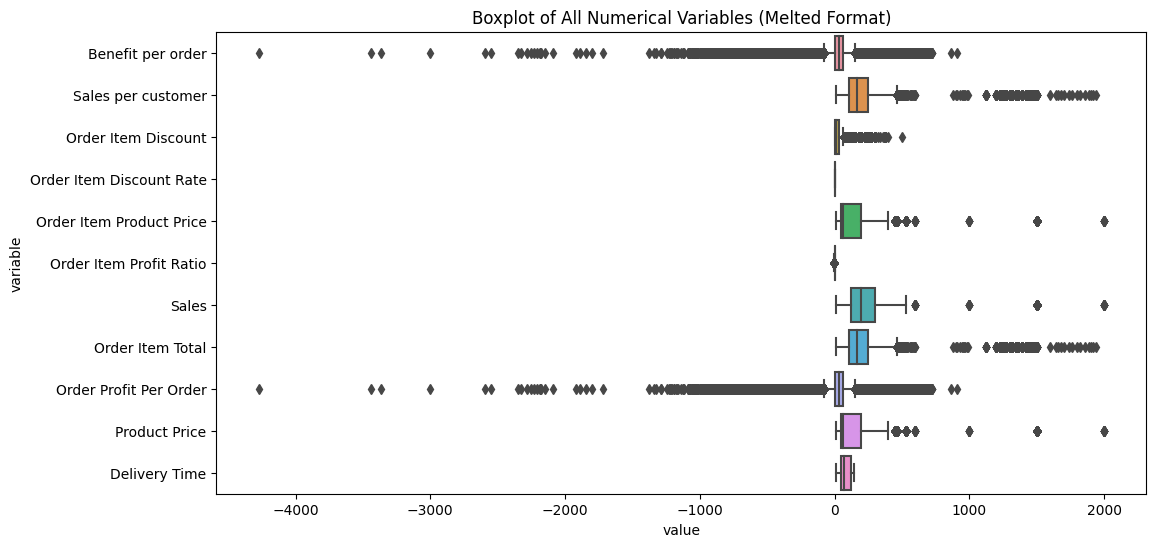

In [51]:
# Visualize outliers using boxplots (combined view)
plt.figure(figsize=(12, 6))
sns.boxplot(y='variable', x='value', data=data_melted)
plt.title("Boxplot of All Numerical Variables (Melted Format)")
plt.show()


In [52]:
# Function to detect outliers using Z-score
def detect_outliers_zscore(data, threshold=3):
    outliers = []
    mean_val = np.mean(data)
    std_dev = np.std(data)
    for value in data:
        z_score = (value - mean_val) / std_dev
        if np.abs(z_score) > threshold:
            outliers.append(value)
    return outliers


In [53]:

# Function to detect outliers using IQR
def detect_outliers_iqr(data):
    outliers = []
    q1, q3 = np.percentile(data, [25, 75])
    iqr_value = q3 - q1
    lower_bound = q1 - 1.5 * iqr_value
    upper_bound = q3 + 1.5 * iqr_value
    for value in data:
        if value < lower_bound or value > upper_bound:
            outliers.append(value)
    return outliers



In [54]:
# Function to replace outliers with the median value of the column
def replace_outliers_with_median(data, outliers):
    median_value = np.median(data)
    return [median_value if val in outliers else val for val in data]


Processing column: Benefit per order
Outliers in 'Benefit per order' using IQR method: 18942 detected
Sample outliers (IQR): [-249.0899963, -247.7799988, -259.5799866, -246.3600006, 154.8600006, -97.33999634, -425.5799866, 152.6000061, -122.7300034, -184.7799988]
Outliers in 'Benefit per order' using Z-score method: 3608 detected
Sample outliers (Z-score): [-425.5799866, -783.6699829, 595.3499756, 415.7999878, -459.0, -447.0499878, -459.6700134, -540.789978, -652.4299927, -790.4199829]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


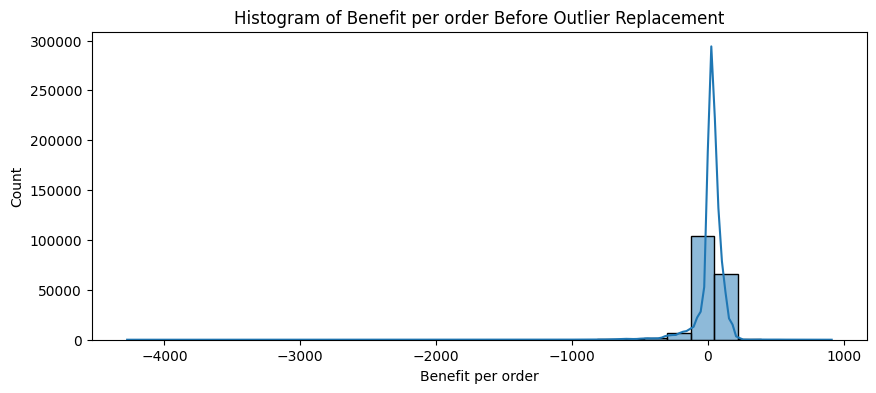

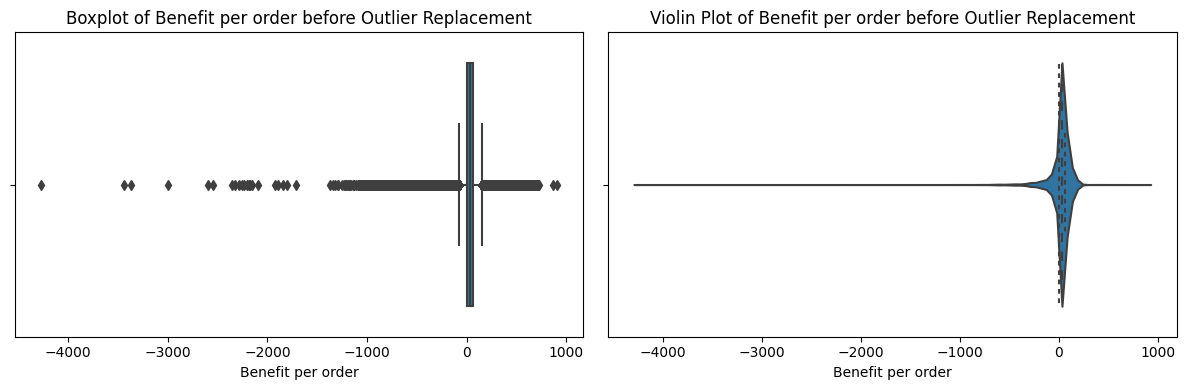

Outliers in 'Benefit per order' replaced with median.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


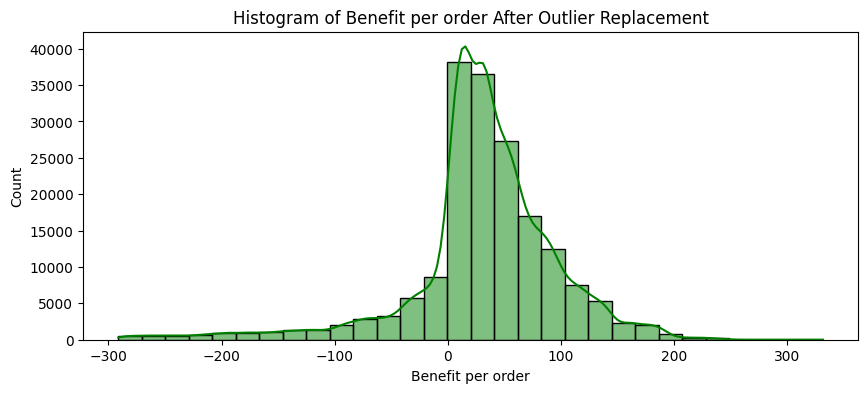

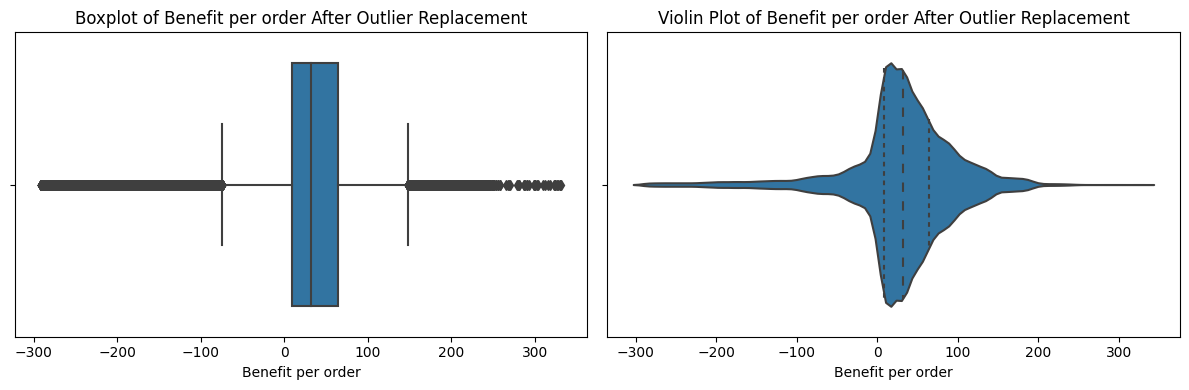



Processing column: Sales per customer
Outliers in 'Sales per customer' using IQR method: 1943 detected
Sample outliers (IQR): [499.9500122, 494.9500122, 484.9500122, 479.9500122, 479.9500122, 474.9500122, 474.9500122, 1417.5, 1395.0, 1365.0]
Outliers in 'Sales per customer' using Z-score method: 477 detected
Sample outliers (Z-score): [1417.5, 1395.0, 1365.0, 1200.0, 989.9899902, 1230.0, 1275.0, 1245.0, 1125.0, 1417.5]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


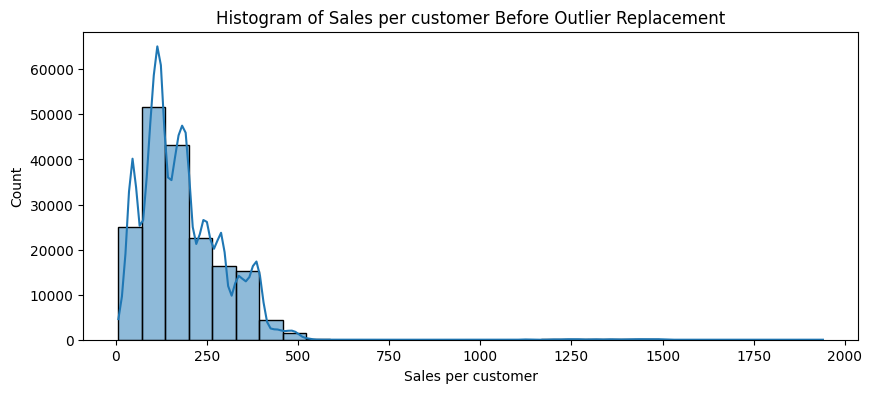

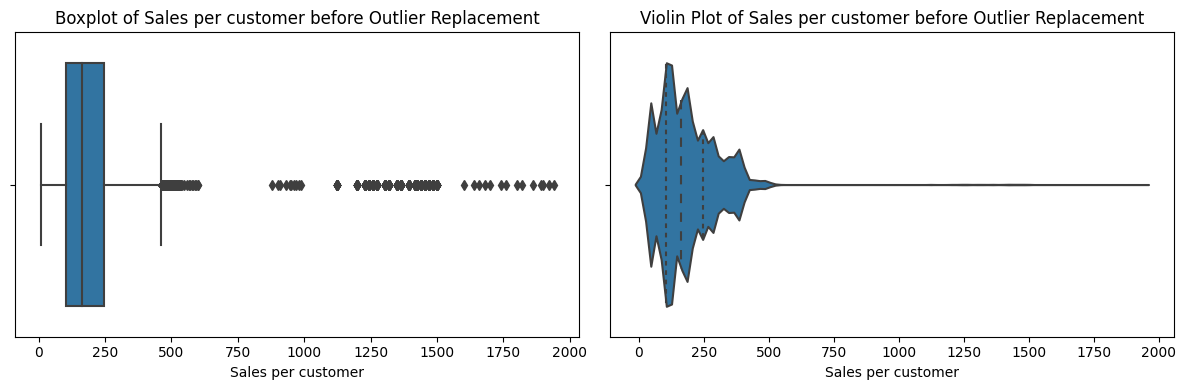

Outliers in 'Sales per customer' replaced with median.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


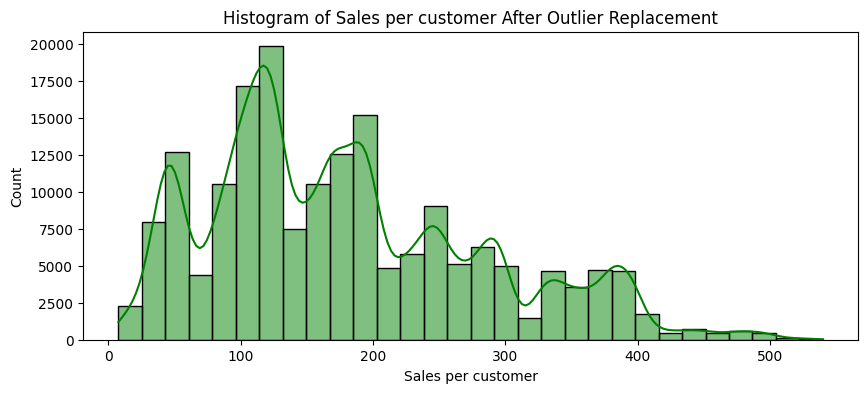

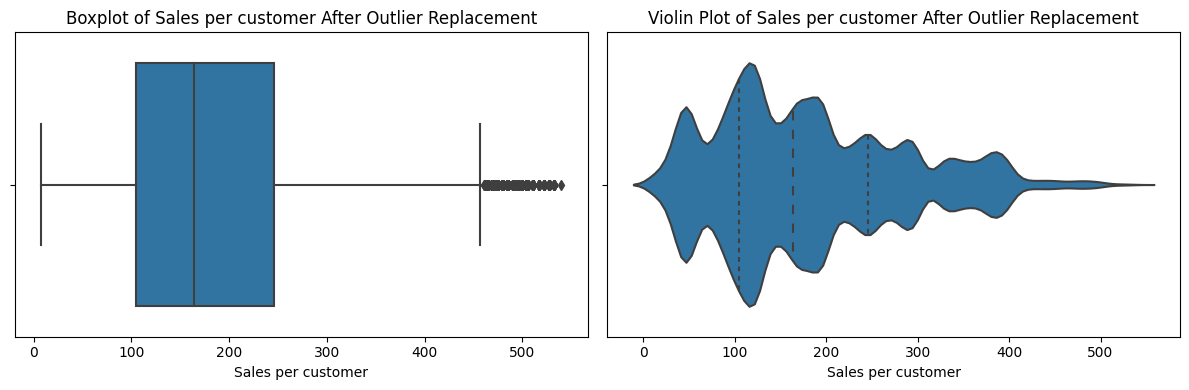



Processing column: Order Item Discount
Outliers in 'Order Item Discount' using IQR method: 7537 detected
Sample outliers (IQR): [81.94000244, 81.94000244, 74.98999786, 112.4899979, 82.5, 105.0, 135.0, 67.80999756, 72.33000183, 81.37000275]
Outliers in 'Order Item Discount' using Z-score method: 2106 detected
Sample outliers (Z-score): [112.4899979, 105.0, 135.0, 300.0, 113.0100021, 124.9899979, 99.98999786, 89.98999786, 89.98999786, 89.98999786]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


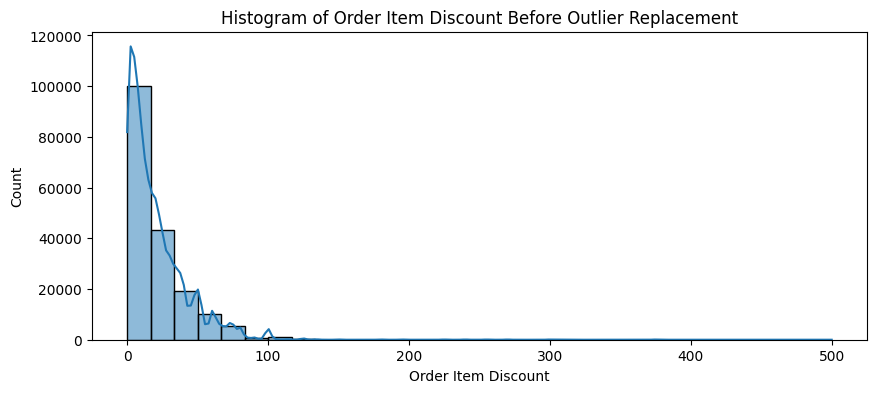

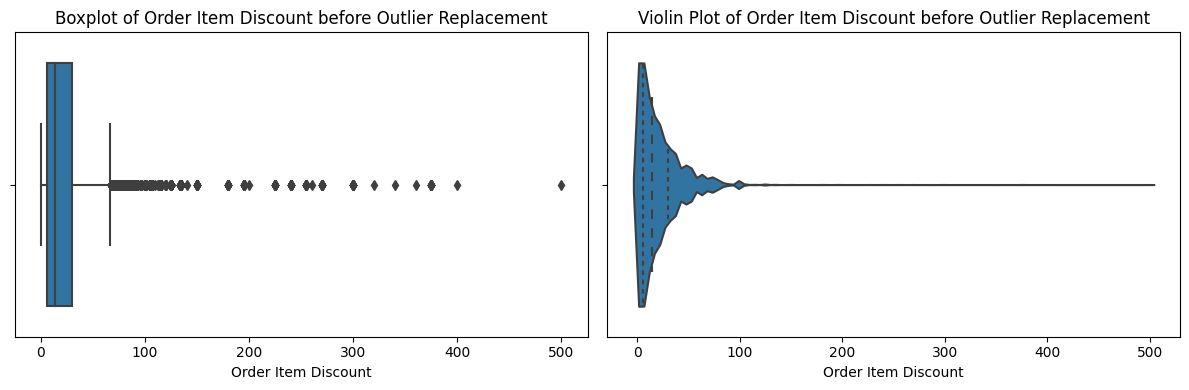

Outliers in 'Order Item Discount' replaced with median.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


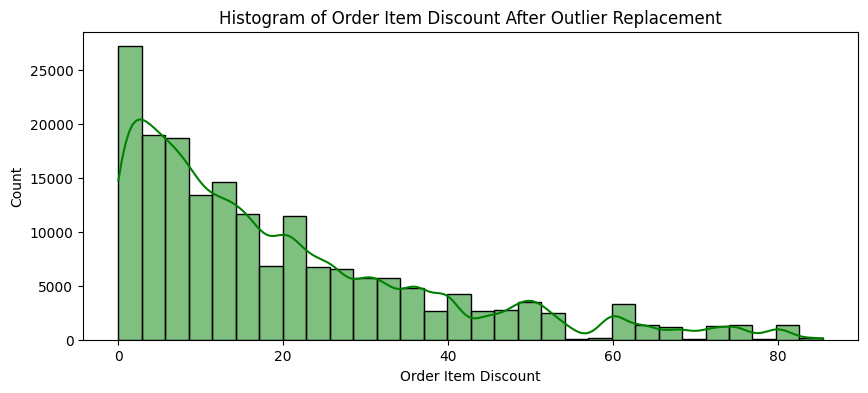

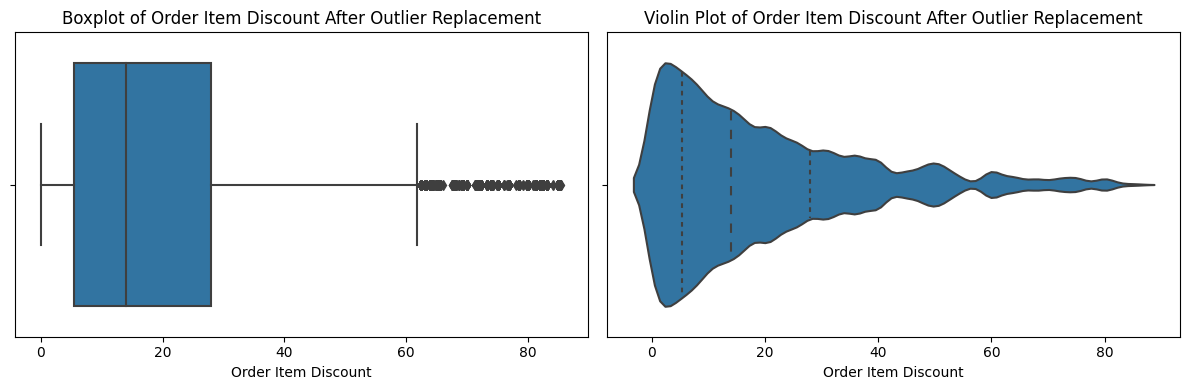



Processing column: Order Item Discount Rate
Outliers in 'Order Item Discount Rate' using IQR method: 0 detected
Sample outliers (IQR): []
Outliers in 'Order Item Discount Rate' using Z-score method: 0 detected
Sample outliers (Z-score): []


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


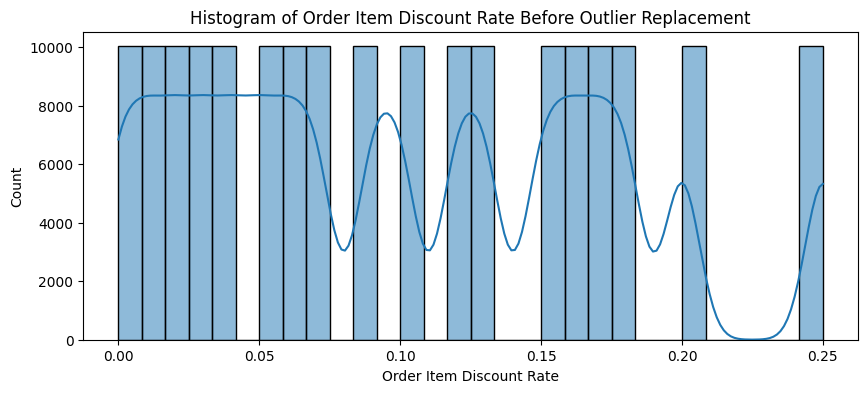

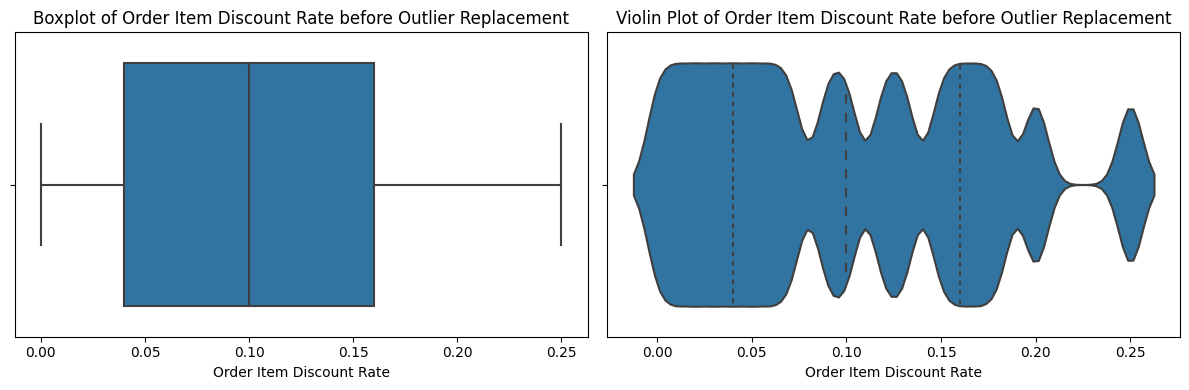

No outliers detected in 'Order Item Discount Rate' using Z-score.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


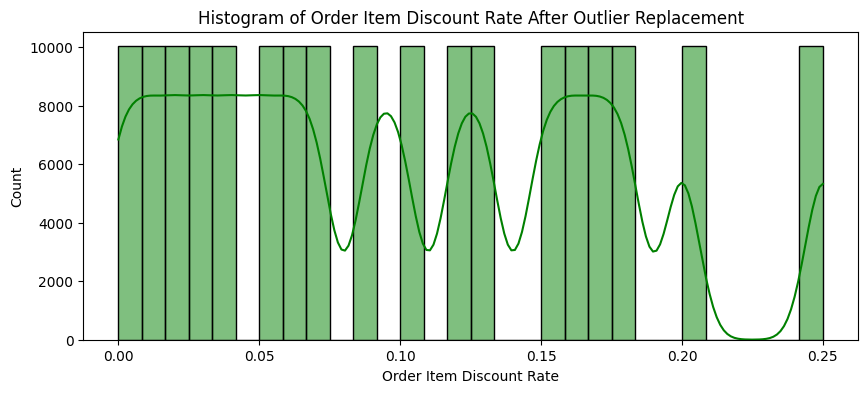

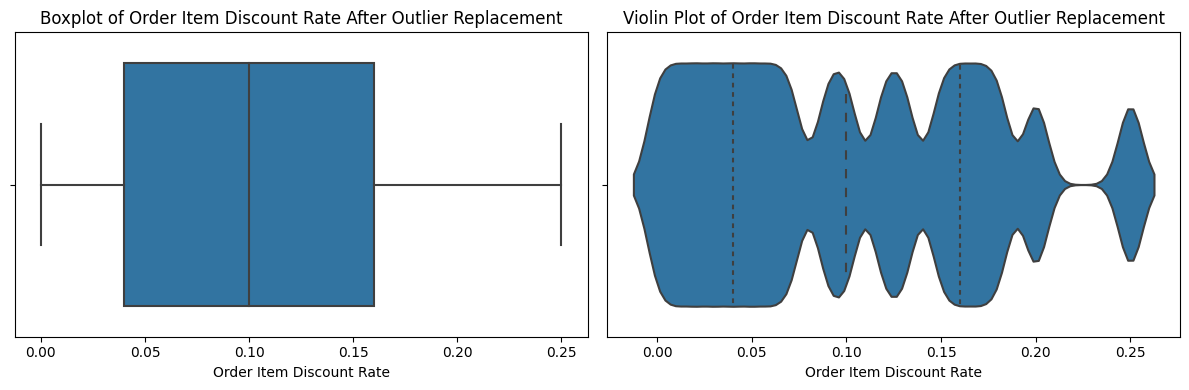



Processing column: Order Item Product Price
Outliers in 'Order Item Product Price' using IQR method: 2048 detected
Sample outliers (IQR): [452.0400085, 452.0400085, 452.0400085, 1500.0, 452.0400085, 452.0400085, 1500.0, 452.0400085, 452.0400085, 1500.0]
Outliers in 'Order Item Product Price' using Z-score method: 488 detected
Sample outliers (Z-score): [1500.0, 1500.0, 1500.0, 1500.0, 999.9899902, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


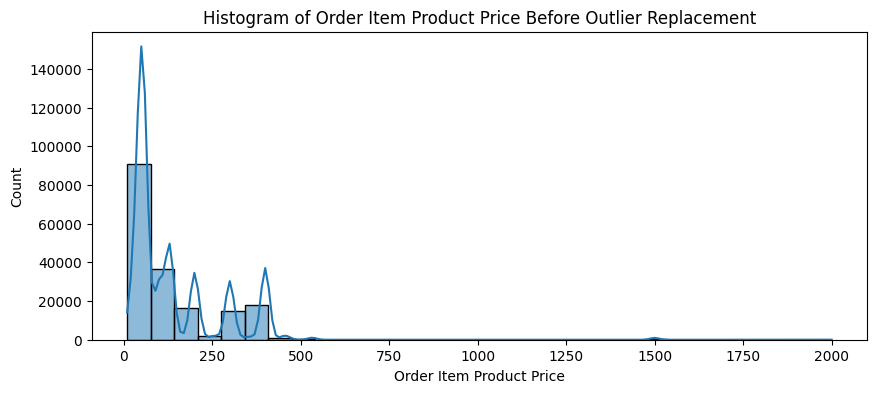

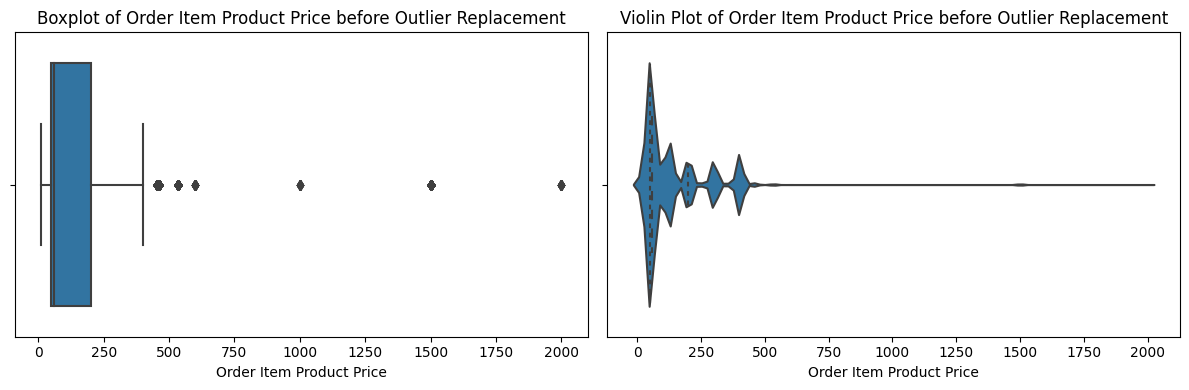

Outliers in 'Order Item Product Price' replaced with median.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


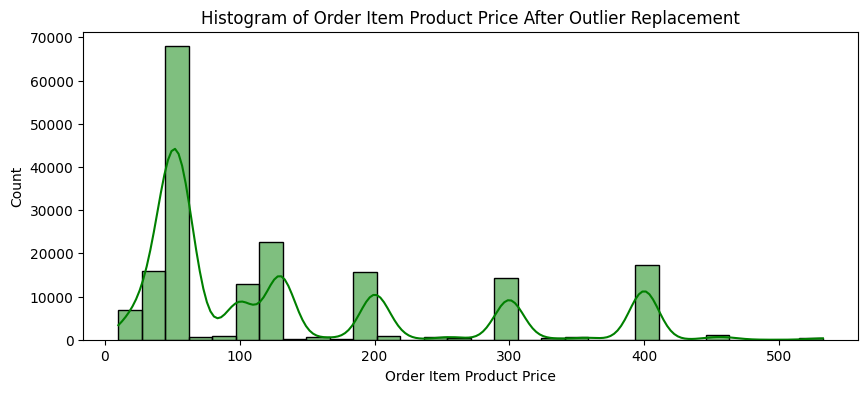

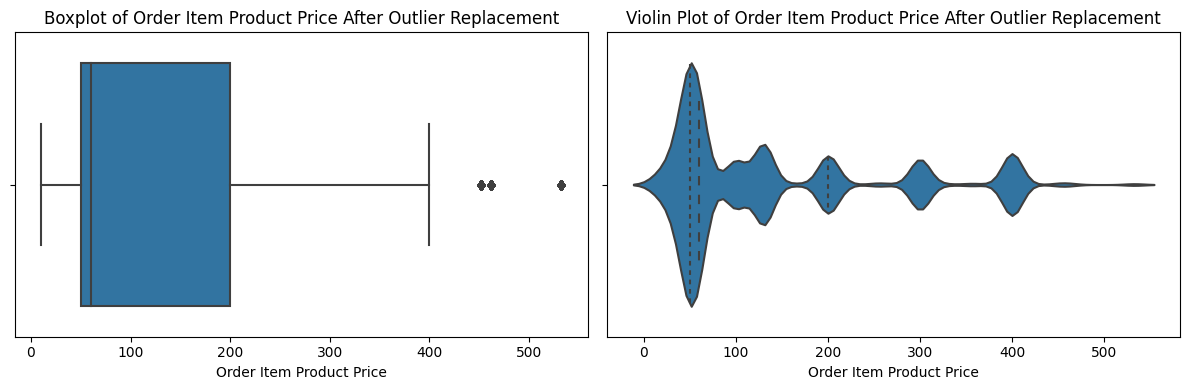



Processing column: Order Item Profit Ratio
Outliers in 'Order Item Profit Ratio' using IQR method: 17300 detected
Sample outliers (IQR): [-0.800000012, -0.800000012, -0.800000012, -0.769999981, -1.330000043, -1.549999952, -0.699999988, -1.600000024, -0.769999981, -0.699999988]
Outliers in 'Order Item Profit Ratio' using Z-score method: 6013 detected
Sample outliers (Z-score): [-1.330000043, -1.549999952, -1.600000024, -1.649999976, -1.700000048, -2.700000048, -1.549999952, -1.5, -1.549999952, -1.600000024]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


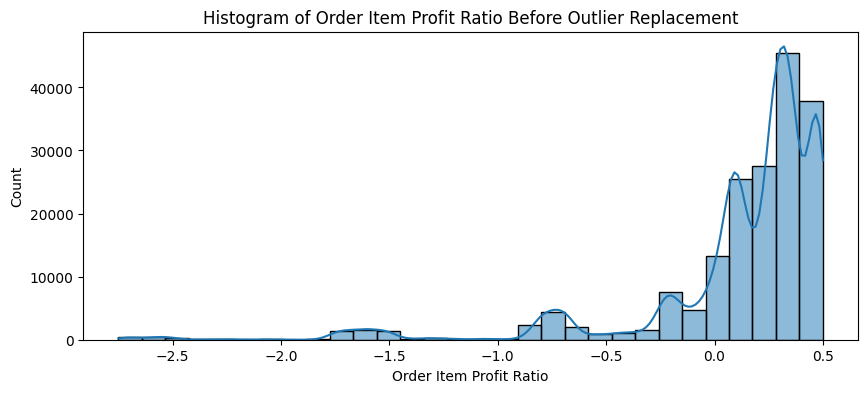

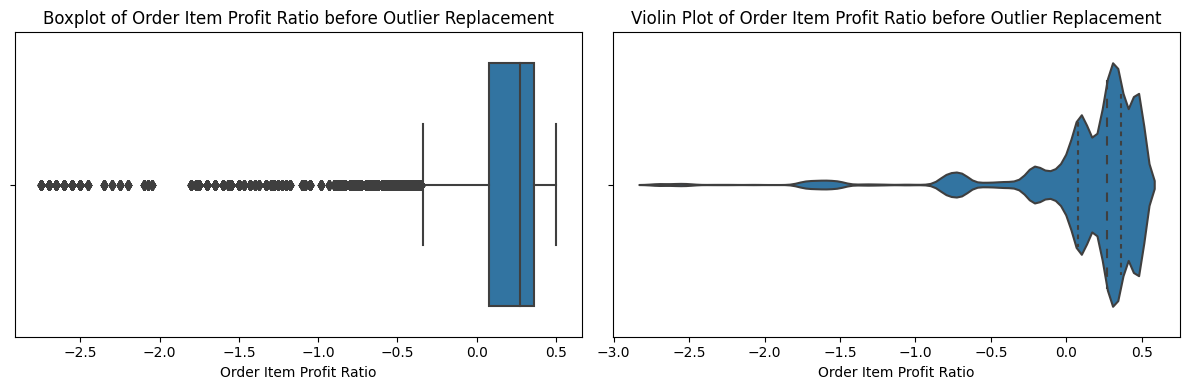

Outliers in 'Order Item Profit Ratio' replaced with median.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


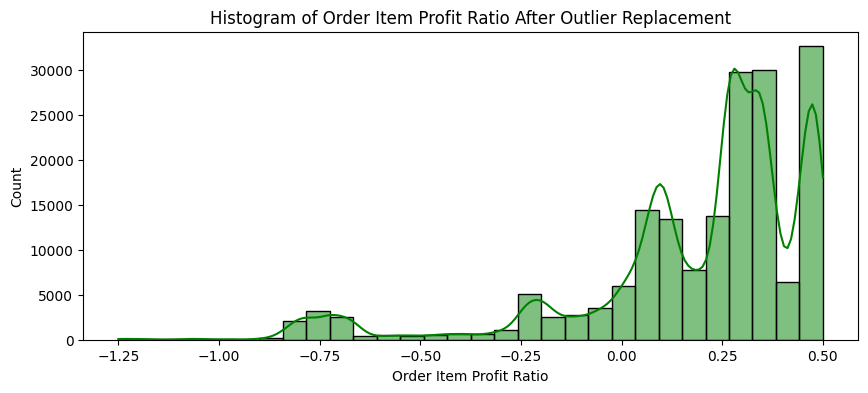

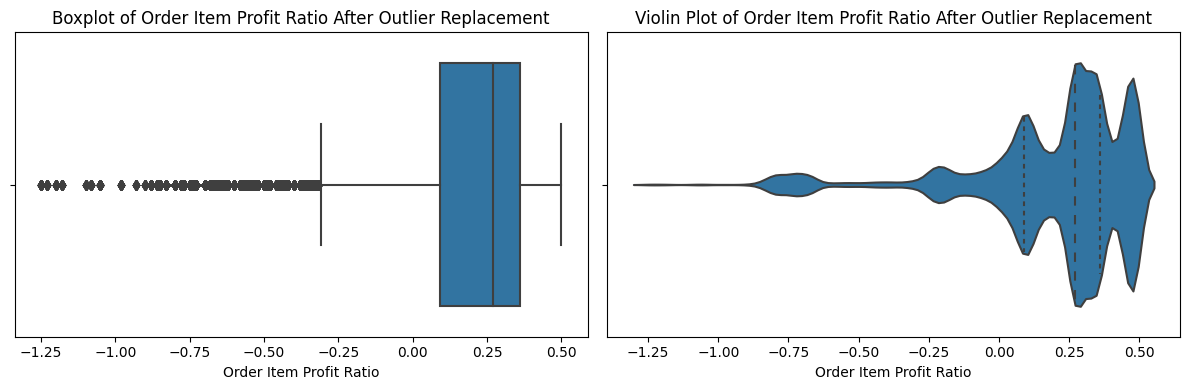



Processing column: Sales
Outliers in 'Sales' using IQR method: 488 detected
Sample outliers (IQR): [1500.0, 1500.0, 1500.0, 1500.0, 999.9899902, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0]
Outliers in 'Sales' using Z-score method: 467 detected
Sample outliers (Z-score): [1500.0, 1500.0, 1500.0, 1500.0, 999.9899902, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


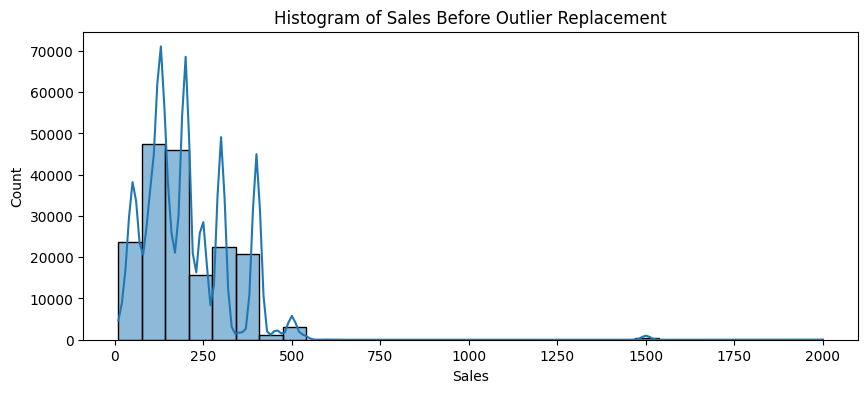

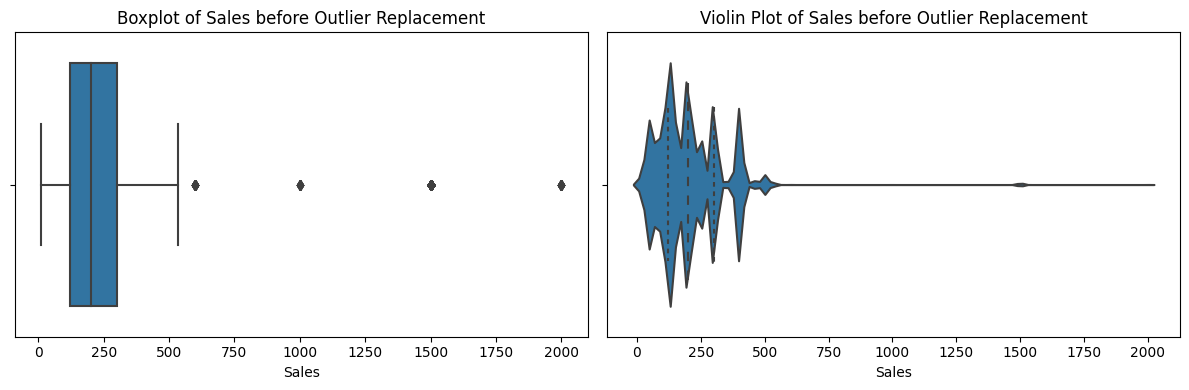

Outliers in 'Sales' replaced with median.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


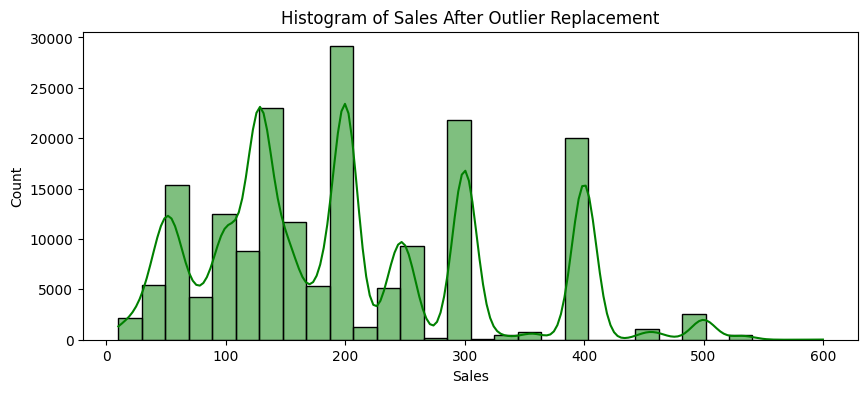

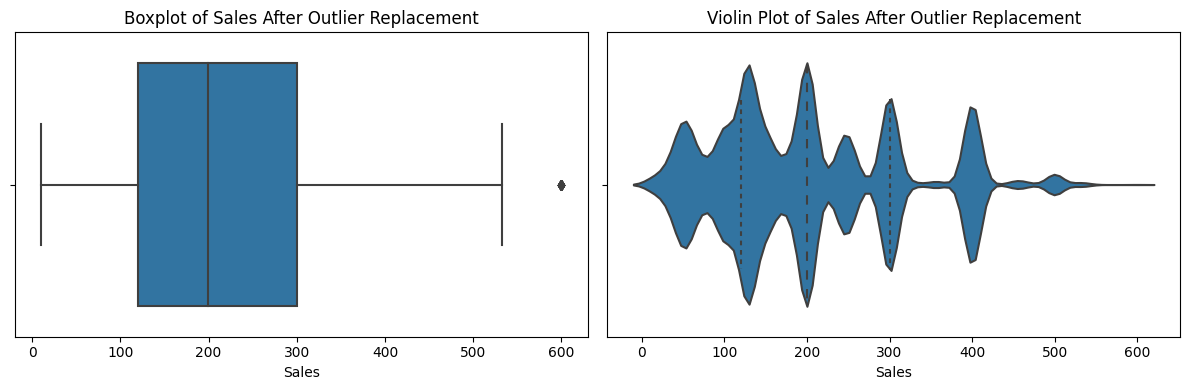



Processing column: Order Item Total
Outliers in 'Order Item Total' using IQR method: 1943 detected
Sample outliers (IQR): [499.9500122, 494.9500122, 484.9500122, 479.9500122, 479.9500122, 474.9500122, 474.9500122, 1417.5, 1395.0, 1365.0]
Outliers in 'Order Item Total' using Z-score method: 477 detected
Sample outliers (Z-score): [1417.5, 1395.0, 1365.0, 1200.0, 989.9899902, 1230.0, 1275.0, 1245.0, 1125.0, 1417.5]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


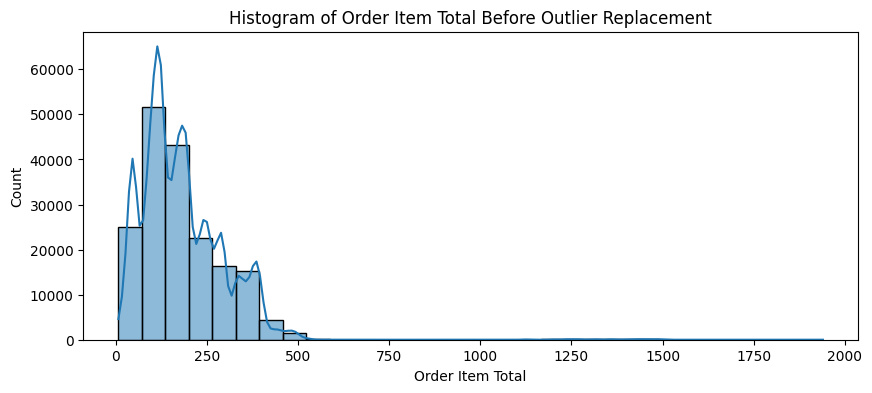

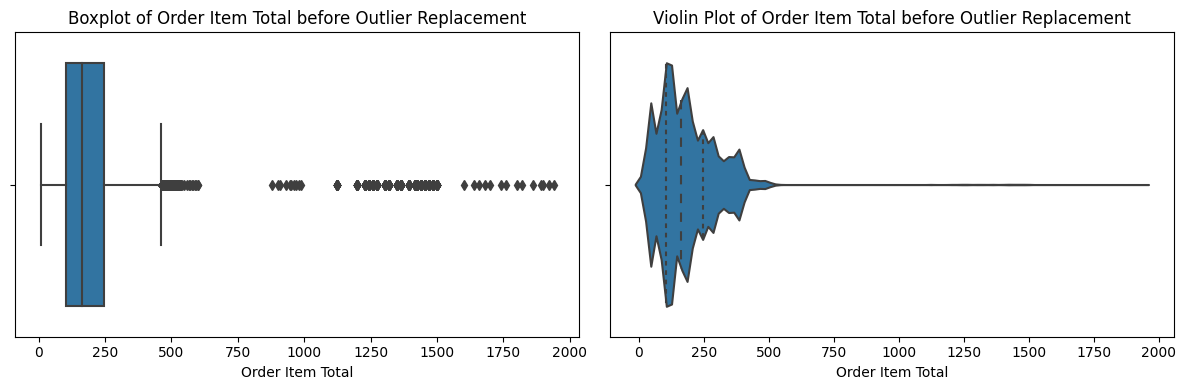

Outliers in 'Order Item Total' replaced with median.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


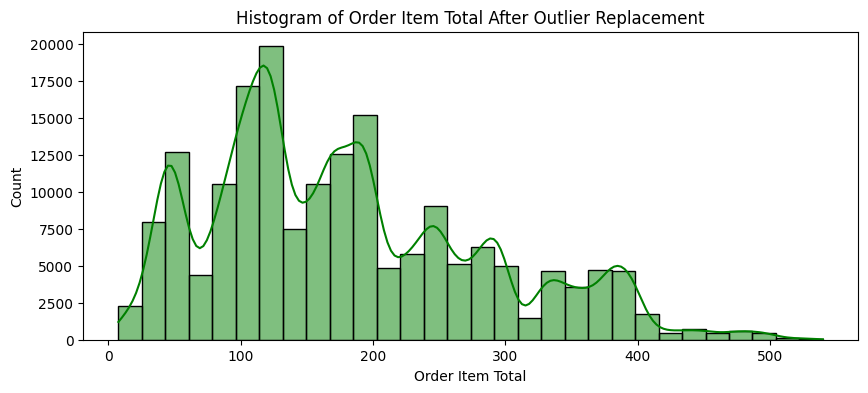

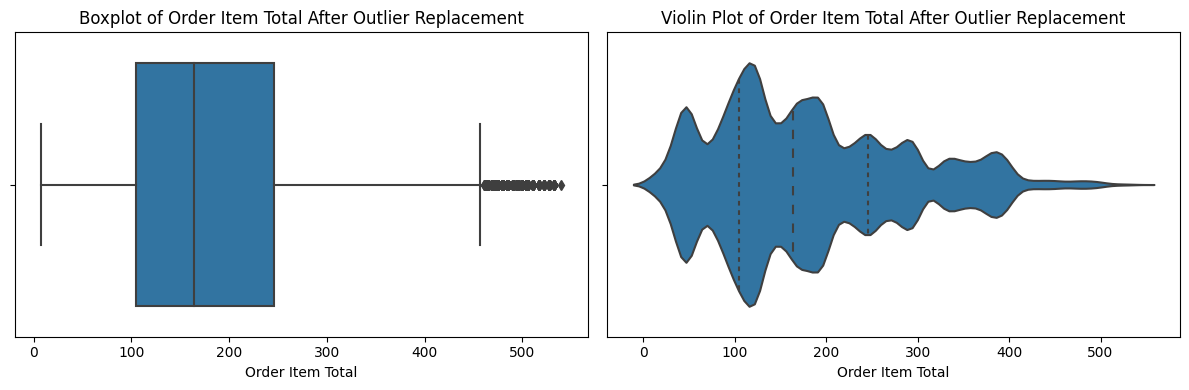



Processing column: Order Profit Per Order
Outliers in 'Order Profit Per Order' using IQR method: 18942 detected
Sample outliers (IQR): [-249.0899963, -247.7799988, -259.5799866, -246.3600006, 154.8600006, -97.33999634, -425.5799866, 152.6000061, -122.7300034, -184.7799988]
Outliers in 'Order Profit Per Order' using Z-score method: 3608 detected
Sample outliers (Z-score): [-425.5799866, -783.6699829, 595.3499756, 415.7999878, -459.0, -447.0499878, -459.6700134, -540.789978, -652.4299927, -790.4199829]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


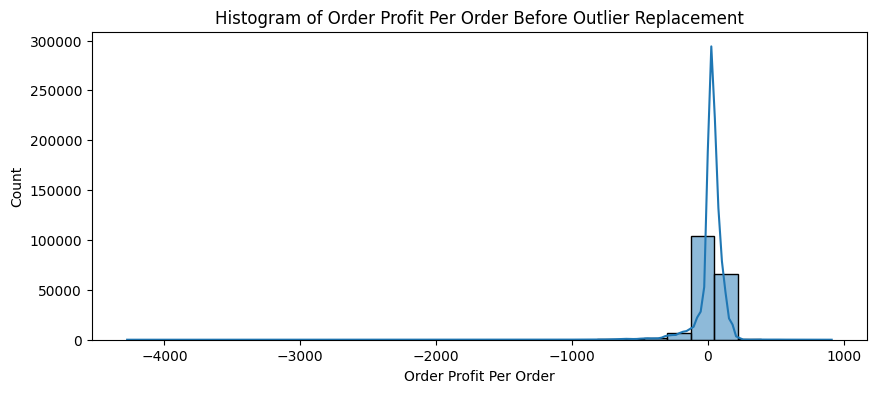

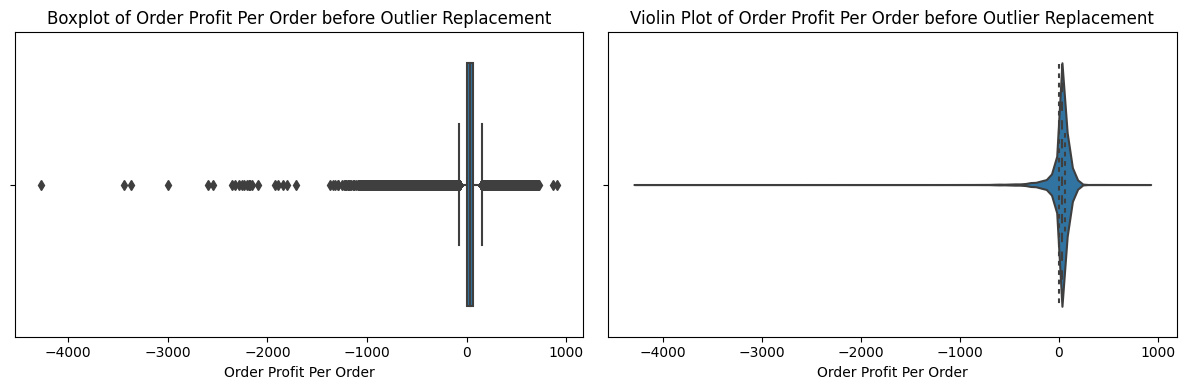

Outliers in 'Order Profit Per Order' replaced with median.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


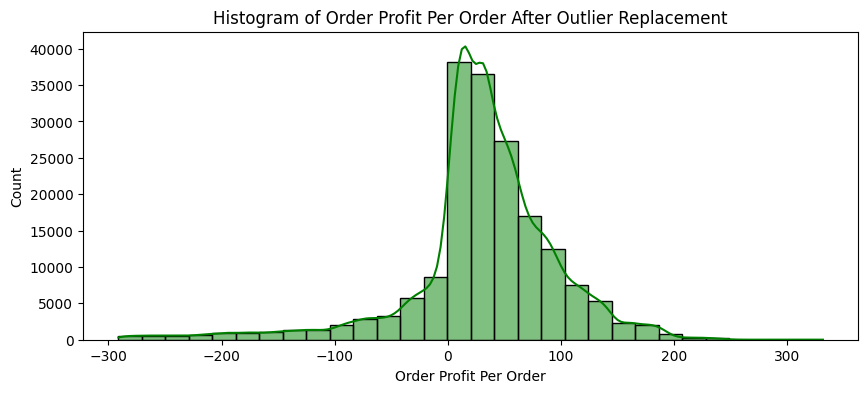

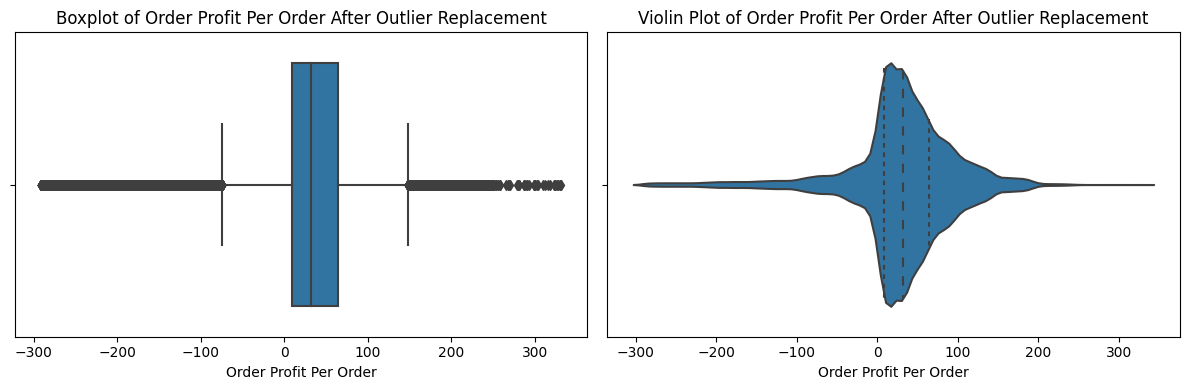



Processing column: Product Price
Outliers in 'Product Price' using IQR method: 2048 detected
Sample outliers (IQR): [452.0400085, 452.0400085, 452.0400085, 1500.0, 452.0400085, 452.0400085, 1500.0, 452.0400085, 452.0400085, 1500.0]
Outliers in 'Product Price' using Z-score method: 488 detected
Sample outliers (Z-score): [1500.0, 1500.0, 1500.0, 1500.0, 999.9899902, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


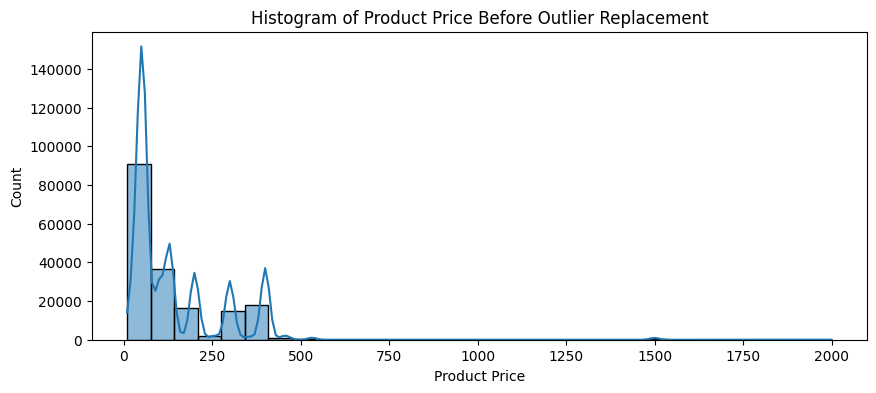

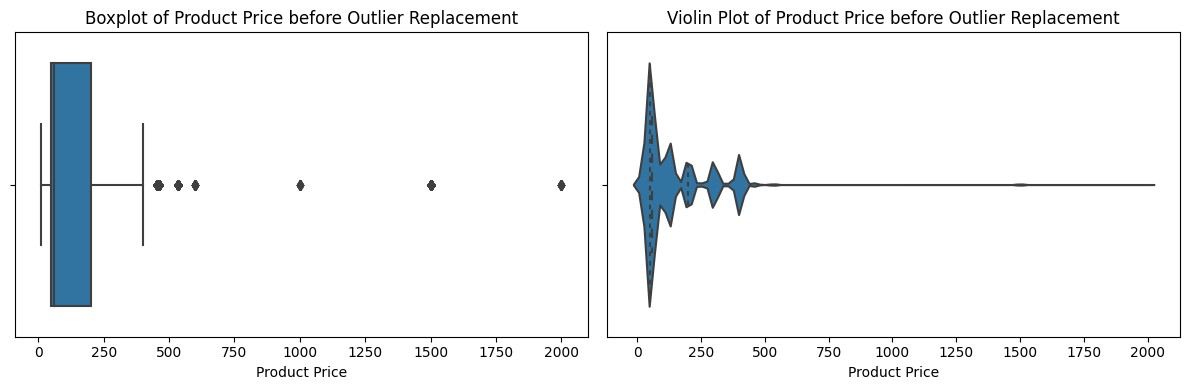

Outliers in 'Product Price' replaced with median.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


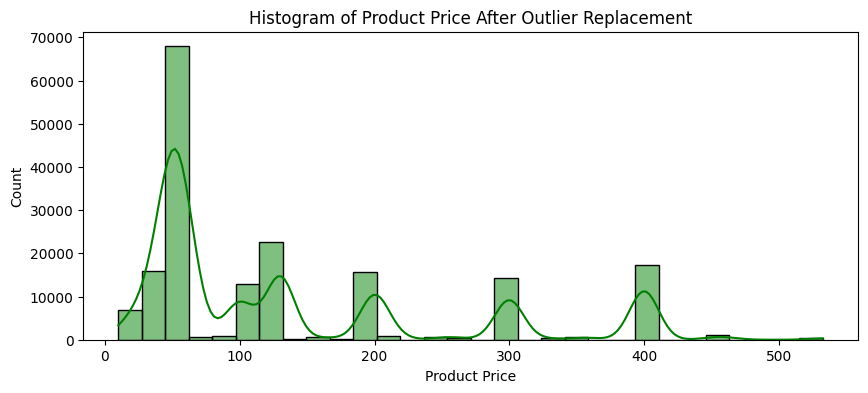

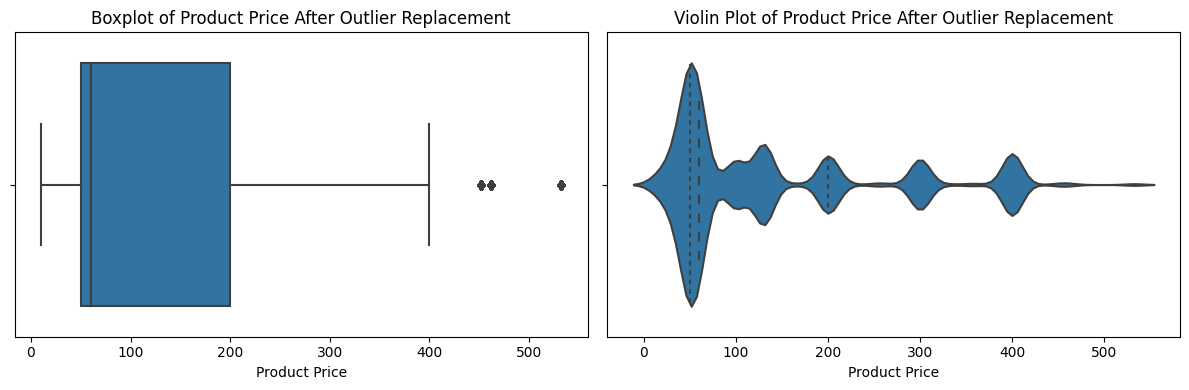



Processing column: Delivery Time
Outliers in 'Delivery Time' using IQR method: 0 detected
Sample outliers (IQR): []
Outliers in 'Delivery Time' using Z-score method: 0 detected
Sample outliers (Z-score): []


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


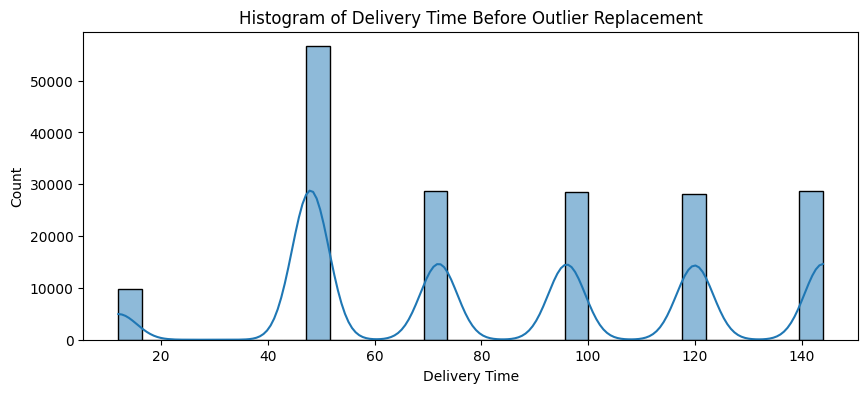

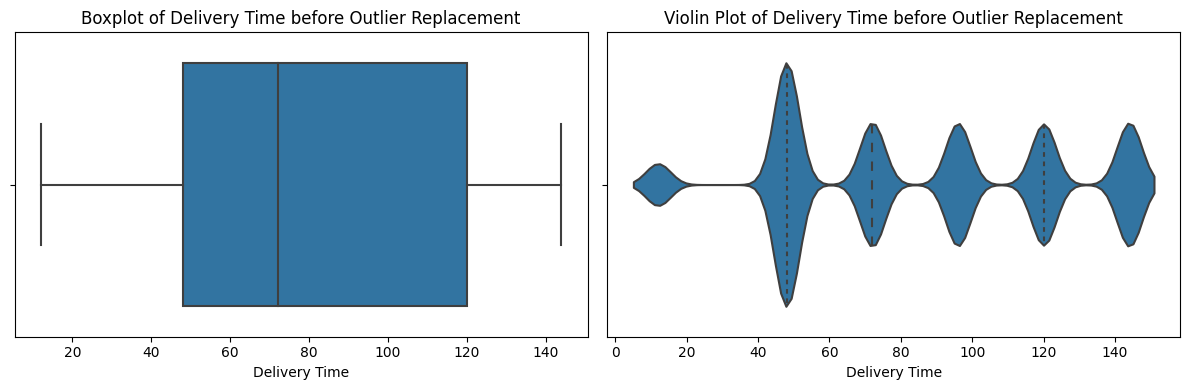

No outliers detected in 'Delivery Time' using Z-score.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


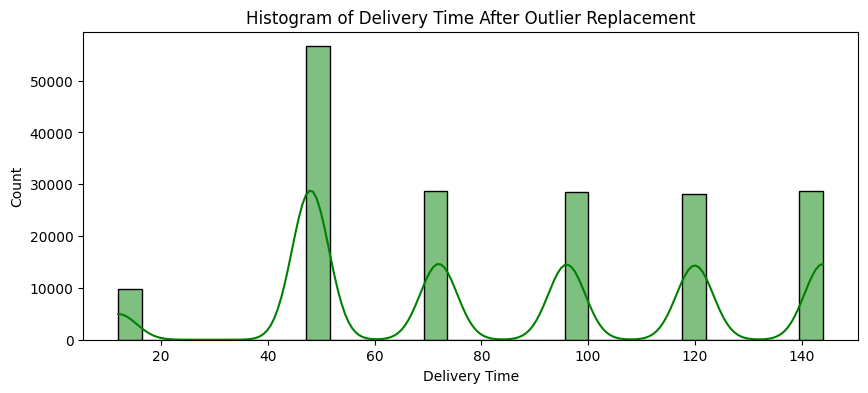

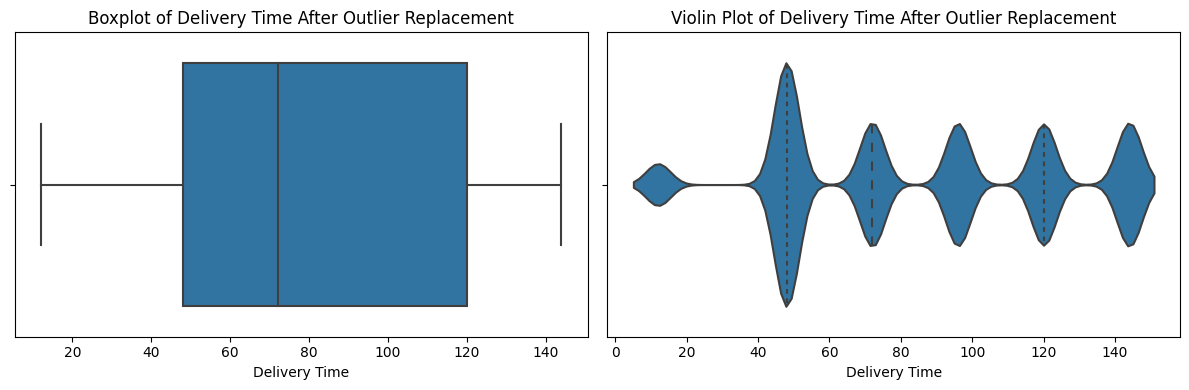

In [55]:
# Loop through each float column to detect and handle outliers
for column in main_df.select_dtypes(include=["float"]).columns:
    print(f"Processing column: {column}")

    # Detect outliers using the IQR method
    outliers_iqr = detect_outliers_iqr(main_df[column])
    print(f"Outliers in '{column}' using IQR method: {len(outliers_iqr)} detected")
    print(f"Sample outliers (IQR): {outliers_iqr[:10]}")

    # Detect outliers using the Z-score method
    outliers_zscore = detect_outliers_zscore(main_df[column])
    print(f"Outliers in '{column}' using Z-score method: {len(outliers_zscore)} detected")
    print(f"Sample outliers (Z-score): {outliers_zscore[:10]}")
    
    # Visualization before outlier handling
    plt.figure(figsize=(10, 4))
    sns.histplot(main_df[column], bins=30, kde=True)
    plt.title(f"Histogram of {column} Before Outlier Replacement")
    plt.show()
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.boxplot(data=main_df, x=column, ax=axes[0])
    axes[0].set_title(f"Boxplot of {column} before Outlier Replacement")
    
    sns.violinplot(data=main_df, x=column, ax=axes[1], inner="quartile")
    axes[1].set_title(f"Violin Plot of {column} before Outlier Replacement")
    plt.tight_layout()
    plt.show()

    # Replace outliers (from Z-score) with median value
    if outliers_zscore:
        main_df[column] = replace_outliers_with_median(main_df[column], outliers_zscore)
        print(f"Outliers in '{column}' replaced with median.")
    else:
        print(f"No outliers detected in '{column}' using Z-score.")
    
    # Visualization after outlier handling
    plt.figure(figsize=(10, 4))
    sns.histplot(main_df[column], bins=30, kde=True, color='green')
    plt.title(f"Histogram of {column} After Outlier Replacement")
    plt.show()
    
    # Boxplot and violin plot to examine the distribution after replacement
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.boxplot(data=main_df, x=column, ax=axes[0])
    axes[0].set_title(f"Boxplot of {column} After Outlier Replacement")
    
    sns.violinplot(data=main_df, x=column, ax=axes[1], inner="quartile")
    axes[1].set_title(f"Violin Plot of {column} After Outlier Replacement")
    plt.tight_layout()
    plt.show()
    
    print("\n")



In [56]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Step 1: Identify float variables in main_df, excluding 'Delivery Time'
float_columns = main_df.select_dtypes(include=["float"]).columns
columns_to_normalize = [col for col in float_columns if col != 'Delivery Time']

print("Float Variables in main_df (excluding 'Delivery Time'):")
print(columns_to_normalize)



Float Variables in main_df (excluding 'Delivery Time'):
['Benefit per order', 'Sales per customer', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Product Price', 'Order Item Profit Ratio', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Product Price']


In [57]:
# Step 2: Calculate the correlation between the columns in 'columns_to_normalize' and 'Late_delivery_risk'
correlation = main_df[columns_to_normalize + ['Late_delivery_risk']].corr()

# Step 3: Extract correlations with 'Late_delivery_risk'
correlation_with_late_delivery_risk = correlation['Late_delivery_risk']

# Step 4: Display the correlation values
print("Correlation with Late_delivery_risk:")
print(correlation_with_late_delivery_risk)


Correlation with Late_delivery_risk:
Benefit per order          -0.001089
Sales per customer         -0.001742
Order Item Discount         0.000106
Order Item Discount Rate    0.000404
Order Item Product Price    0.000160
Order Item Profit Ratio    -0.000296
Sales                      -0.001530
Order Item Total           -0.001742
Order Profit Per Order     -0.001089
Product Price               0.000160
Late_delivery_risk          1.000000
Name: Late_delivery_risk, dtype: float64


In [58]:

# Step 2: View summary statistics of the float variables before normalization
print("\nSummary Statistics Before Normalization:")
print(main_df[columns_to_normalize].describe())




Summary Statistics Before Normalization:
       Benefit per order  Sales per customer  Order Item Discount  \
count      180519.000000       180519.000000        180519.000000   
mean           30.925797          180.012215            19.450800   
std            67.854070          103.962889            18.243408   
min          -291.190002            7.490000             0.000000   
25%             8.860000          104.379997             5.400000   
50%            31.520000          163.990005            14.000000   
75%            64.599998          245.979996            28.000000   
max           331.500000          539.989990            85.489998   

       Order Item Discount Rate  Order Item Product Price  \
count             180519.000000             180519.000000   
mean                   0.101668                137.430599   
std                    0.070415                121.060213   
min                    0.000000                  9.990000   
25%                    0.040000

In [59]:
# Step 3: Normalize the float variables using Min-Max Scaling
scaler = MinMaxScaler()
scaler.fit(main_df[columns_to_normalize])
scaled_features = scaler.transform(main_df[columns_to_normalize])



In [60]:
# Creating a DataFrame with the normalized features
df_MinMax = pd.DataFrame(data=scaled_features, columns=columns_to_normalize)

# Step 4: Combine the normalized data with the original DataFrame, keeping 'Delivery Time'


In [61]:
normalized_data = main_df.copy()
normalized_data[columns_to_normalize] = df_MinMax



In [62]:
normalized_data.columns

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Late_delivery_risk',
       'Order Item Discount', 'Order Item Discount Rate',
       'Order Item Product Price', 'Order Item Profit Ratio', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Product Price',
       'Order Hour', 'Shipping Hour', 'Delivery Time', 'Order Time of Day',
       'Shipping Time of Day', 'Type_CASH', 'Type_DEBIT', 'Type_PAYMENT',
       'Type_TRANSFER', 'Shipping Mode_First Class', 'Shipping Mode_Same Day',
       'Shipping Mode_Second Class', 'Shipping Mode_Standard Class',
       'Order Status_CANCELED', 'Order Status_CLOSED', 'Order Status_COMPLETE',
       'Order Status_ON_HOLD', 'Order Status_PAYMENT_REVIEW',
       'Order Status_PENDING', 'Order Status_PENDING_PAYMENT',
       'Order Status_PROCESSING', 'Order Status_SUSPECTED_FRAUD'],
      dtype='object')

In [63]:
normalized_data.dtypes

Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Late_delivery_risk                 int64
Order Item Discount              float64
Order Item Discount Rate         float64
Order Item Product Price         float64
Order Item Profit Ratio          float64
Sales                            float64
Order Item Total                 float64
Order Profit Per Order           float64
Product Price                    float64
Order Hour                         int32
Shipping Hour                      int32
Delivery Time                    float64
Order Time of Day                  int64
Shipping Time of Day               int64
Type_CASH                           bool
Type_DEBIT                          bool
Type_PAYMENT                        bool
Type_TRANSFER                       bool
Shipping Mode_First Class           bool
Shipping Mode_Same Day              bool
Shipping Mode_Se

In [64]:
normalized_data = normalized_data.loc[:, ~normalized_data.columns.str.startswith('Order Status_')]
normalized_data.columns = [col.replace(" ", "_") for col in normalized_data.columns]

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np




# Initialize a dictionary to store top features for each model
top_features = {}
model_results = []
# Updated evaluate_model to store top features for each model
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, feature_names=None):
    # Fit the model
    model.fit(X_train, y_train)

    # Predict probabilities and labels
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    else:
        y_probs = model.decision_function(X_test)
    y_pred = model.predict(X_test)

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_probs)
    cm = confusion_matrix(y_test, y_pred)

    # Calculate precision, recall, and F1-score for both classes
    precision_class_0 = cm[0, 0] / (cm[0, 0] + cm[1, 0]) if (cm[0, 0] + cm[1, 0]) > 0 else 0
    recall_class_0 = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) > 0 else 0
    f1_class_0 = 2 * (precision_class_0 * recall_class_0) / (precision_class_0 + recall_class_0) if (precision_class_0 + recall_class_0) > 0 else 0

    precision_class_1 = cm[1, 1] / (cm[1, 1] + cm[0, 1]) if (cm[1, 1] + cm[0, 1]) > 0 else 0
    recall_class_1 = cm[1, 1] / (cm[1, 1] + cm[1, 0]) if (cm[1, 1] + cm[1, 0]) > 0 else 0
    f1_class_1 = 2 * (precision_class_1 * recall_class_1) / (precision_class_1 + recall_class_1) if (precision_class_1 + recall_class_1) > 0 else 0

    # Append results to model_results list
    model_results.append({
        "Model": model_name,
        "Accuracy": acc,
        "ROC AUC": roc_auc,
        "Precision (Class 0)": precision_class_0,
        "Recall (Class 0)": recall_class_0,
        "F1-Score (Class 0)": f1_class_0,
        "Precision (Class 1)": precision_class_1,
        "Recall (Class 1)": recall_class_1,
        "F1-Score (Class 1)": f1_class_1
    })

    # Extract and store top 10 important features for applicable models
    if hasattr(model, "coef_") or hasattr(model, "feature_importances_"):
        if hasattr(model, "coef_"):  # Logistic Regression
            importances = np.abs(model.coef_[0])
        else:  # Decision Tree, Random Forest, Gradient Boosting, XGBoost
            importances = model.feature_importances_
        feature_importance = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)[:10]
        top_features[model_name] = [f"{feature} ({importance:.4f})" for feature, importance in feature_importance]
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
# Load data and prepare balanced training set
X = normalized_data.drop(columns=['Late_delivery_risk'])
y = normalized_data['Late_delivery_risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# smote = SMOTE(random_state=42)
# X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)










In [66]:


lr_model = LogisticRegression(random_state=42)
evaluate_model(lr_model, X_train, X_test, y_train, y_test, "Logistic Regression", feature_names=X.columns)




/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:


dt_model = DecisionTreeClassifier(random_state=42)
evaluate_model(dt_model, X_train, X_test, y_train, y_test, "Decision Tree", feature_names=X.columns)





In [68]:

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest", feature_names=X.columns)

In [69]:

gb_model = GradientBoostingClassifier(random_state=42)
evaluate_model(gb_model, X_train, X_test, y_train, y_test, "Gradient Boosting", feature_names=X.columns)

In [70]:


xgb_model = XGBClassifier(random_state=42)
evaluate_model(xgb_model, X_train, X_test, y_train, y_test, "XGBoost", feature_names=X.columns)

In [71]:
from catboost import CatBoostClassifier
from collections import Counter


cat_model = CatBoostClassifier(random_state=42,verbose=0)
evaluate_model(cat_model, X_train, X_test, y_train, y_test, "CatBoost", feature_names=X.columns)

In [72]:
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier(random_state=42)
evaluate_model(lgb_model, X_train, X_test, y_train, y_test, "LightGBM", feature_names=X.columns)

[LightGBM] [Info] Number of positive: 69232, number of negative: 57131
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005569 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1824
[LightGBM] [Info] Number of data points in the train set: 126363, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547882 -> initscore=0.192116
[LightGBM] [Info] Start training from score 0.192116


In [73]:
top_features 


{'Logistic Regression': ['Days_for_shipment_(scheduled) (4.2220)',
  'Type_TRANSFER (1.8390)',
  'Shipping_Mode_First_Class (1.2128)',
  'Shipping_Mode_Second_Class (0.9751)',
  'Shipping_Mode_Standard_Class (0.8712)',
  'Shipping_Mode_Same_Day (0.7989)',
  'Shipping_Hour (0.3852)',
  'Order_Hour (0.3848)',
  'Order_Item_Profit_Ratio (0.3378)',
  'Type_CASH (0.2790)'],
 'Decision Tree': ['Days_for_shipment_(scheduled) (0.4253)',
  'Delivery_Time (0.4107)',
  'Days_for_shipping_(real) (0.0723)',
  'Benefit_per_order (0.0112)',
  'Type_TRANSFER (0.0110)',
  'Order_Profit_Per_Order (0.0108)',
  'Order_Item_Profit_Ratio (0.0094)',
  'Order_Item_Discount (0.0086)',
  'Order_Item_Total (0.0066)',
  'Sales_per_customer (0.0061)'],
 'Random Forest': ['Days_for_shipping_(real) (0.2727)',
  'Delivery_Time (0.2701)',
  'Days_for_shipment_(scheduled) (0.1159)',
  'Shipping_Mode_Standard_Class (0.1159)',
  'Shipping_Mode_First_Class (0.0660)',
  'Shipping_Mode_Second_Class (0.0400)',
  'Order_Hour 

In [74]:
model_results

[{'Model': 'Logistic Regression',
  'Accuracy': 0.9708619543540882,
  'ROC AUC': 0.9814594846687468,
  'Precision (Class 0)': 0.9871975419280502,
  'Recall (Class 0)': 0.9476465527835811,
  'F1-Score (Class 0)': 0.9670178078755955,
  'Precision (Class 1)': 0.9584024997558832,
  'Recall (Class 1)': 0.9899142713061019,
  'F1-Score (Class 1)': 0.9739035522921214},
 {'Model': 'Decision Tree',
  'Accuracy': 0.956717630548785,
  'ROC AUC': 0.9567984119711469,
  'Precision (Class 0)': 0.948972533062055,
  'Recall (Class 0)': 0.9553479988529762,
  'F1-Score (Class 0)': 0.9521495937614829,
  'Precision (Class 1)': 0.9631520232581725,
  'Recall (Class 1)': 0.9578416540595058,
  'F1-Score (Class 1)': 0.9604894987020869},
 {'Model': 'Random Forest',
  'Accuracy': 0.9740564295738238,
  'ROC AUC': 0.9938765904298481,
  'Precision (Class 0)': 0.9959899965505347,
  'Recall (Class 0)': 0.9462537380689033,
  'F1-Score (Class 0)': 0.970485053463017,
  'Precision (Class 1)': 0.9576282134091203,
  'Recall 

In [75]:
df_model_results = pd.DataFrame(model_results)


from IPython.display import display
display(df_model_results)

,Model,Accuracy,ROC AUC,Precision (Class 0),Recall (Class 0),F1-Score (Class 0),Precision (Class 1),Recall (Class 1),F1-Score (Class 1)
0,Logistic Regression,0.970862,0.981459,0.987198,0.947647,0.967018,0.958402,0.989914,0.973904
1,Decision Tree,0.956718,0.956798,0.948973,0.955348,0.952150,0.963152,0.957842,0.960489
2,Random Forest,0.974056,0.993877,0.995990,0.946254,0.970485,0.957628,0.996873,0.976857
3,Gradient Boosting,0.975257,0.993618,1.000000,0.945107,0.971779,0.956892,1.000000,0.977971
4,XGBoost,0.974740,0.993719,0.998529,0.945353,0.971213,0.957030,0.998857,0.977496
5,CatBoost,0.974943,0.993692,0.999177,0.945189,0.971433,0.956928,0.999361,0.977684
6,LightGBM,0.975146,0.993763,0.999740,0.945107,0.971656,0.956884,0.999798,0.977871


In [76]:
top_features_df = pd.DataFrame.from_dict(top_features, orient='index').transpose()

# Display the DataFrame
from IPython.display import display
display(top_features_df)

,Logistic Regression,Decision Tree,Random Forest,Gradient Boosting,XGBoost,CatBoost,LightGBM
0,Days_for_shipment_(scheduled) (4.2220),Days_for_shipment_(scheduled) (0.4253),Days_for_shipping_(real) (0.2727),Days_for_shipment_(scheduled) (0.3955),Days_for_shipment_(scheduled) (0.5746),Days_for_shipping_(real) (36.5361),Benefit_per_order (438.0000)
1,Type_TRANSFER (1.8390),Delivery_Time (0.4107),Delivery_Time (0.2701),Days_for_shipping_(real) (0.2627),Days_for_shipping_(real) (0.3131),Delivery_Time (18.0953),Days_for_shipping_(real) (334.0000)
2,Shipping_Mode_First_Class (1.2128),Days_for_shipping_(real) (0.0723),Days_for_shipment_(scheduled) (0.1159),Delivery_Time (0.2126),Type_TRANSFER (0.0956),Days_for_shipment_(scheduled) (17.4215),Sales_per_customer (332.0000)
3,Shipping_Mode_Second_Class (0.9751),Benefit_per_order (0.0112),Shipping_Mode_Standard_Class (0.1159),Shipping_Mode_First_Class (0.0528),Order_Item_Discount_Rate (0.0015),Shipping_Mode_Standard_Class (9.1055),Order_Hour (323.0000)
4,Shipping_Mode_Standard_Class (0.8712),Type_TRANSFER (0.0110),Shipping_Mode_First_Class (0.0660),Shipping_Mode_Standard_Class (0.0469),Shipping_Time_of_Day (0.0014),Type_TRANSFER (8.9509),Order_Item_Discount (317.0000)
5,Shipping_Mode_Same_Day (0.7989),Order_Profit_Per_Order (0.0108),Shipping_Mode_Second_Class (0.0400),Shipping_Mode_Second_Class (0.0158),Benefit_per_order (0.0014),Shipping_Mode_Second_Class (3.1081),Order_Item_Profit_Ratio (300.0000)
6,Shipping_Hour (0.3852),Order_Item_Profit_Ratio (0.0094),Order_Hour (0.0154),Type_TRANSFER (0.0122),Order_Item_Discount (0.0014),Shipping_Mode_First_Class (2.5242),Days_for_shipment_(scheduled) (192.0000)
7,Order_Hour (0.3848),Order_Item_Discount (0.0086),Shipping_Hour (0.0145),Shipping_Mode_Same_Day (0.0011),Shipping_Hour (0.0013),Order_Hour (0.6355),Order_Item_Product_Price (155.0000)
8,Order_Item_Profit_Ratio (0.3378),Order_Item_Total (0.0066),Order_Profit_Per_Order (0.0106),Order_Hour (0.0001),Order_Item_Profit_Ratio (0.0013),Shipping_Hour (0.5821),Type_TRANSFER (151.0000)
9,Type_CASH (0.2790),Sales_per_customer (0.0061),Benefit_per_order (0.0106),Order_Item_Discount (0.0001),Order_Item_Product_Price (0.0013),Type_PAYMENT (0.5533),Order_Item_Discount_Rate (131.0000)


In [77]:
import pandas as pd



models_dict = {
    "Logistic Regression": lr_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model,
    "XGBoost": xgb_model,
    "CatBoost": cat_model,
    "LightGBM": lgb_model
}
# Define the common features to remove for all models
common_features_to_remove = [
    "Days_for_shipment_(scheduled)", 
    "Days_for_shipping_(real)", 
    "Delivery_Time", 
    "Type_TRANSFER", 
    "Shipping_Mode_Standard_Class"
]

# Function to evaluate models after removing common features
def evaluate_accuracy_after_removing_common_features(models, X_train, X_test, y_train, y_test, features_to_remove):
    results = []

    for model_name, model in models.items():
        for i in range(1, len(features_to_remove) + 1):  # Remove top 1 to all 5 features
            # Get the top i features to remove
            features_subset = features_to_remove[:i]
            
            # Remove features from training and test sets
            X_train_temp = X_train.drop(columns=features_subset, errors="ignore")
            X_test_temp = X_test.drop(columns=features_subset, errors="ignore")
            
            # Fit the model and calculate accuracy
            model.fit(X_train_temp, y_train)
            accuracy = model.score(X_test_temp, y_test)
            
            # Store the results
            results.append({
                "Model": model_name,
                "Removed Features": ", ".join(features_subset),
                "Accuracy": round(accuracy, 6)
            })

    # Convert to DataFrame
    results_df = pd.DataFrame(results)
    return results_df


# Evaluate accuracy after removing the common features
accuracy_results_df = evaluate_accuracy_after_removing_common_features(
    models=models_dict,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    features_to_remove=common_features_to_remove
)

# Display the results
print("Accuracy Results After Removing Common Predictors:")
display(accuracy_results_df)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[LightGBM] [Info] Number of positive: 69232, number of negative: 57131
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1820
[LightGBM] [Info] Number of data points in the train set: 126363, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547882 -> initscore=0.192116
[LightGBM] [Info] Start training from score 0.192116
[LightGBM] [Info] Number of positive: 69232, number of negative: 57131
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1813
[LightGBM] [Info] Number of data points in the train set: 126363, number of used features: 23
[LightGBM] [Info] 

,Model,Removed Features,Accuracy
0,Logistic Regression,Days_for_shipment_(scheduled),0.971730
1,Logistic Regression,"Days_for_shipment_(scheduled), Days_for_shippi...",0.957345
2,Logistic Regression,"Days_for_shipment_(scheduled), Days_for_shippi...",0.717040
3,Logistic Regression,"Days_for_shipment_(scheduled), Days_for_shippi...",0.717040
4,Logistic Regression,"Days_for_shipment_(scheduled), Days_for_shippi...",0.717040
5,Decision Tree,Days_for_shipment_(scheduled),0.956681
6,Decision Tree,"Days_for_shipment_(scheduled), Days_for_shippi...",0.957198
7,Decision Tree,"Days_for_shipment_(scheduled), Days_for_shippi...",0.633596
8,Decision Tree,"Days_for_shipment_(scheduled), Days_for_shippi...",0.632802
9,Decision Tree,"Days_for_shipment_(scheduled), Days_for_shippi...",0.633208


In [78]:



import pandas as pd

# Assuming your results are stored in a variable called `impact_results_df`
# Display the table
from IPython.display import display

# Display the results as a nicely formatted DataFrame
display(accuracy_results_df.style.set_table_attributes("style='display:inline'").set_caption("Impact of Removing Top Predictors"))




,Model,Removed Features,Accuracy
0,Logistic Regression,Days_for_shipment_(scheduled),0.971730
1,Logistic Regression,"Days_for_shipment_(scheduled), Days_for_shipping_(real)",0.957345
2,Logistic Regression,"Days_for_shipment_(scheduled), Days_for_shipping_(real), Delivery_Time",0.717040
3,Logistic Regression,"Days_for_shipment_(scheduled), Days_for_shipping_(real), Delivery_Time, Type_TRANSFER",0.717040
4,Logistic Regression,"Days_for_shipment_(scheduled), Days_for_shipping_(real), Delivery_Time, Type_TRANSFER, Shipping_Mode_Standard_Class",0.717040
5,Decision Tree,Days_for_shipment_(scheduled),0.956681
6,Decision Tree,"Days_for_shipment_(scheduled), Days_for_shipping_(real)",0.957198
7,Decision Tree,"Days_for_shipment_(scheduled), Days_for_shipping_(real), Delivery_Time",0.633596
8,Decision Tree,"Days_for_shipment_(scheduled), Days_for_shipping_(real), Delivery_Time, Type_TRANSFER",0.632802
9,Decision Tree,"Days_for_shipment_(scheduled), Days_for_shipping_(real), Delivery_Time, Type_TRANSFER, Shipping_Mode_Standard_Class",0.633208


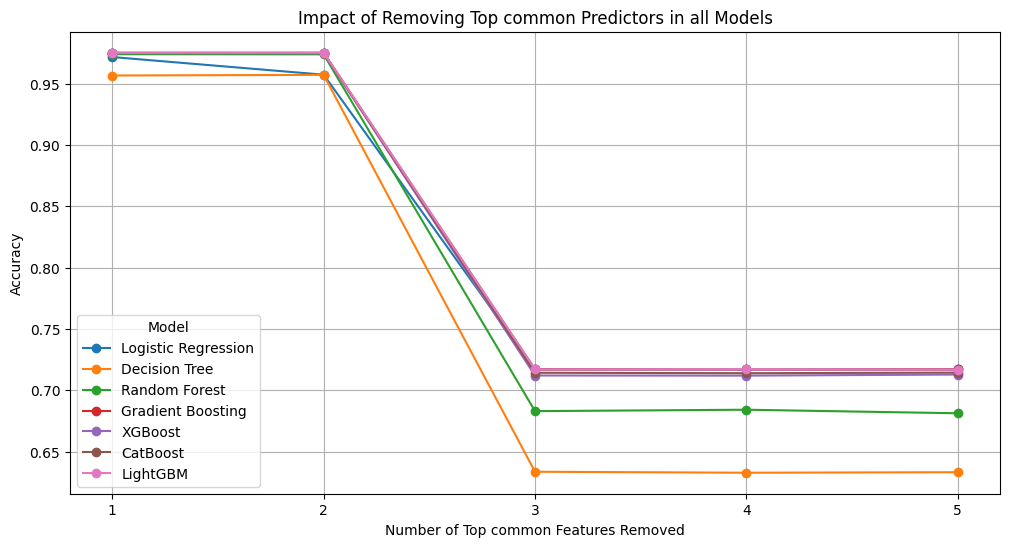

In [79]:


import matplotlib.pyplot as plt

# Map feature removal count to integers for x-axis
accuracy_results_df['Removed Count'] = accuracy_results_df.groupby('Model').cumcount() + 1

# Plot the bar chart
plt.figure(figsize=(12, 6))
for model_name in accuracy_results_df['Model'].unique():
    subset = accuracy_results_df[accuracy_results_df['Model'] == model_name]
    plt.plot(subset['Removed Count'], subset['Accuracy'], marker='o', label=model_name)

# Add labels and title
plt.xlabel("Number of Top common Features Removed")
plt.ylabel("Accuracy")
plt.title("Impact of Removing Top common Predictors in all Models")
plt.legend(title="Model", loc="lower left")
plt.grid(True)
plt.xticks(ticks=range(1, 6), labels=[1, 2, 3, 4, 5])

plt.show()



In [80]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

# Simulated Data Setup
X = normalized_data.drop(columns=['Late_delivery_risk'])
y = normalized_data['Late_delivery_risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Splitting data into training and test sets

# Model Training
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=200)
gb_model.fit(X_train, y_train)

lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

cat_model = CatBoostClassifier(random_state=42, verbose=0)
cat_model.fit(X_train, y_train)

# Define Top Predictors
top_predictors = {
    "Gradient Boosting": "Days_for_shipment_(scheduled)",
    "LightGBM": "Days_for_shipping_(real)",
    "CatBoost": "Benefit_per_order"
}

# Models Dictionary
models_dict = {
    "Gradient Boosting": gb_model,
    "LightGBM": lgb_model,
    "CatBoost": cat_model
}

# Corrected Function for Simulating Changes in Top Predictors
def simulate_top_predictor(models, X_train, X_test, y_test, top_predictors, change_pct):
    results = []
    
    # Align test data with training feature names
    feature_names = X_train.columns
    X_test_aligned = X_test.reindex(columns=feature_names, fill_value=0)

    for model_name, model in models.items():
        predictor = top_predictors.get(model_name)  # Get the top predictor for the model

        # Baseline predictions
        baseline_probs = model.predict_proba(X_test_aligned)[:, 1]
        baseline_risk = np.mean(baseline_probs) * 100

        # Modify the predictor
        modified_X_test = X_test_aligned.copy()
        if predictor in modified_X_test.columns:
            modified_X_test[predictor] = modified_X_test[predictor] * (1 - change_pct / 100)

            # Predictions after modification
            modified_probs = model.predict_proba(modified_X_test)[:, 1]
            modified_risk = np.mean(modified_probs) * 100

            # Calculate impact
            risk_reduction = (baseline_risk - modified_risk) / baseline_risk * 100

            # Store results
            results.append({
                "Model": model_name,
                "Top Predictor": predictor,
                "Change (%)": change_pct,
                "Baseline Late Delivery Risk (%)": round(baseline_risk, 2),
                f"Late Delivery Risk After {change_pct}% Change (%)": round(modified_risk, 2),
                "Reduction in Risk (%)": round(risk_reduction, 2),
            })
    return pd.DataFrame(results)

# Run the Simulation
change_pct = 10  # Example: 10% reduction
scenario_results_df = simulate_top_predictor(models_dict, X_train, X_test, y_test, top_predictors, change_pct)

# Display Results
print("Scenario Analysis for Top Predictors:")
print(scenario_results_df)


[LightGBM] [Info] Number of positive: 69232, number of negative: 57131
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1824
[LightGBM] [Info] Number of data points in the train set: 126363, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547882 -> initscore=0.192116
[LightGBM] [Info] Start training from score 0.192116
Scenario Analysis for Top Predictors:
               Model                  Top Predictor  Change (%)  \
0  Gradient Boosting  Days_for_shipment_(scheduled)          10   
1           LightGBM       Days_for_shipping_(real)          10   
2           CatBoost              Benefit_per_order          10   

   Baseline Late Delivery Risk (%)  Late Delivery Risk After 10% Change (%)  \
0                            54.94                       

In [81]:
print("X_train columns:", X_train.columns)
print("X_test columns:", X_test.columns)


X_train columns: Index(['Days_for_shipping_(real)', 'Days_for_shipment_(scheduled)',
       'Benefit_per_order', 'Sales_per_customer', 'Order_Item_Discount',
       'Order_Item_Discount_Rate', 'Order_Item_Product_Price',
       'Order_Item_Profit_Ratio', 'Sales', 'Order_Item_Total',
       'Order_Profit_Per_Order', 'Product_Price', 'Order_Hour',
       'Shipping_Hour', 'Delivery_Time', 'Order_Time_of_Day',
       'Shipping_Time_of_Day', 'Type_CASH', 'Type_DEBIT', 'Type_PAYMENT',
       'Type_TRANSFER', 'Shipping_Mode_First_Class', 'Shipping_Mode_Same_Day',
       'Shipping_Mode_Second_Class', 'Shipping_Mode_Standard_Class'],
      dtype='object')
X_test columns: Index(['Days_for_shipping_(real)', 'Days_for_shipment_(scheduled)',
       'Benefit_per_order', 'Sales_per_customer', 'Order_Item_Discount',
       'Order_Item_Discount_Rate', 'Order_Item_Product_Price',
       'Order_Item_Profit_Ratio', 'Sales', 'Order_Item_Total',
       'Order_Profit_Per_Order', 'Product_Price', 'Order_Hour'

In [82]:

top_predictors = {
    "Gradient Boosting": ["Delivery_Time", "Days_for_shipping_(real)"],
    "LightGBM": [ "Benefit_per_order","Days_for_shipping_(real)"],
    "CatBoost": ["Days_for_shipping_(real)","Delivery_Time"]
}

# Models Dictionary
models_dict = {
    "Gradient Boosting": gb_model,
    "LightGBM": lgb_model,
    "CatBoost": cat_model
}

def simulate_top_predictors(models, X_train, X_test, y_test, top_predictors, change_pct):
    results = []
    
    # Align test data with training feature names
    feature_names = X_train.columns
    X_test_aligned = X_test.reindex(columns=feature_names, fill_value=0)

    for model_name, model in models.items():
        predictors = top_predictors.get(model_name)  # Get the top predictors for the model
        
        if len(predictors) < 2:
            raise ValueError(f"Model {model_name} must have at least two top predictors.")

        predictor_1, predictor_2 = predictors

        # Baseline predictions
        baseline_probs = model.predict_proba(X_test_aligned)[:, 1]
        baseline_risk = np.mean(baseline_probs) * 100

        # Scenario 1: Change Predictor 1
        modified_X_test_1 = X_test_aligned.copy()
        if predictor_1 in modified_X_test_1.columns:
            modified_X_test_1[predictor_1] *= (1 - change_pct / 100)
            modified_probs_1 = model.predict_proba(modified_X_test_1)[:, 1]
            modified_risk_1 = np.mean(modified_probs_1) * 100
            risk_reduction_1 = (baseline_risk - modified_risk_1) / baseline_risk * 100

            results.append({
                "Model": model_name,
                "Predictor(s)": predictor_1,
                "Change (%)": change_pct,
                "Baseline Late Delivery Risk (%)": round(baseline_risk, 2),
                f"Late Delivery Risk After {change_pct}% Change (%)": round(modified_risk_1, 2),
                "Reduction in Risk (%)": round(risk_reduction_1, 2),
            })

        # Scenario 2: Change Predictor 2
        modified_X_test_2 = X_test_aligned.copy()
        if predictor_2 in modified_X_test_2.columns:
            modified_X_test_2[predictor_2] *= (1 - change_pct / 100)
            modified_probs_2 = model.predict_proba(modified_X_test_2)[:, 1]
            modified_risk_2 = np.mean(modified_probs_2) * 100
            risk_reduction_2 = (baseline_risk - modified_risk_2) / baseline_risk * 100

            results.append({
                "Model": model_name,
                "Predictor(s)": predictor_2,
                "Change (%)": change_pct,
                "Baseline Late Delivery Risk (%)": round(baseline_risk, 2),
                f"Late Delivery Risk After {change_pct}% Change (%)": round(modified_risk_2, 2),
                "Reduction in Risk (%)": round(risk_reduction_2, 2),
            })

        # Scenario 3: Change Both Predictors
        modified_X_test_both = X_test_aligned.copy()
        if predictor_1 in modified_X_test_both.columns and predictor_2 in modified_X_test_both.columns:
            modified_X_test_both[predictor_1] *= (1 - change_pct / 100)
            modified_X_test_both[predictor_2] *= (1 - change_pct / 100)
            modified_probs_both = model.predict_proba(modified_X_test_both)[:, 1]
            modified_risk_both = np.mean(modified_probs_both) * 100
            risk_reduction_both = (baseline_risk - modified_risk_both) / baseline_risk * 100

            results.append({
                "Model": model_name,
                "Predictor(s)": f"{predictor_1} + {predictor_2}",
                "Change (%)": change_pct,
                "Baseline Late Delivery Risk (%)": round(baseline_risk, 2),
                f"Late Delivery Risk After {change_pct}% Change (%)": round(modified_risk_both, 2),
                "Reduction in Risk (%)": round(risk_reduction_both, 2),
            })

    return pd.DataFrame(results)



# Run the Simulation
change_pct = 10  # Example: 10% reduction
scenario_results_df = simulate_top_predictors(models_dict, X_train, X_test, y_test, top_predictors, change_pct)

# Display Results
print("Scenario Analysis for Top Predictors:")
print(scenario_results_df)


Scenario Analysis for Top Predictors:
               Model                                  Predictor(s)  \
0  Gradient Boosting                                 Delivery_Time   
1  Gradient Boosting                      Days_for_shipping_(real)   
2  Gradient Boosting      Delivery_Time + Days_for_shipping_(real)   
3           LightGBM                             Benefit_per_order   
4           LightGBM                      Days_for_shipping_(real)   
5           LightGBM  Benefit_per_order + Days_for_shipping_(real)   
6           CatBoost                      Days_for_shipping_(real)   
7           CatBoost                                 Delivery_Time   
8           CatBoost      Days_for_shipping_(real) + Delivery_Time   

   Change (%)  Baseline Late Delivery Risk (%)  \
0          10                            54.94   
1          10                            54.94   
2          10                            54.94   
3          10                            54.96   
4          